In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (18, 6)

# Beer Advocate Informations

## ba_beers.csv

In [2]:
ba_beers = pd.read_csv('generated/new_ba_beers.csv')

| Column Name       | Description                                   | Commentary                              |
|-------------------|-----------------------------------------------|-----------------------------------------|
| beer_id           | id of each beer.                              |  unique for each beer. (int)            |
| beer_name         | name of the beer.                             | (str)                                     |
| brewery_id        | id of brewery of the beer.                    | unique for each brewery. (int)               |
| brewery_name      | name of the brewery.                              |  (str)            |
| style             | style of the beer.                            | 104 differents styles (str)             |
| nbr_ratings       | Total number of ratings for the beer.         | (int)               |
| nbr_reviews       | Total number of reviews for the beer.         | (int)               |
| avg        |       -           |              |
| ba_score        | aggregated rating for each beer         |   out of 100           |
| bros_score        | rating provided by the BeerAdvocate website's founders, Todd and Jason Alström, who are also known as "The Bros."                  |    out of 100          |
| abv        |  Alcohol by Volume                |    in %          |
| avg_computed      | "mean" of the different scores given in reviews                         |  ratings are coming from reviews.txt (txt)            |
| zscore             |        -                     |             |
| nbr_matched_valid_ratings|  Number of “valid” notes for this beer in cross-referenced data.       | when compared with another dataset such as RateBeer.            |
| avg_matched_valid_ratings|  Mean of “valid” notes for this beer in cross-referenced data.       |      |
| continent |  continent of the breweries.       | added to compare continents and group      |
| type|  type of the beer.       | added for comparison     |

We have not yet investigated the exact way in which avg and z_score have been calculated. We have not yet needed to use these parameters in our initial analyses, so we will analyse them if necessary when the time comes.

## ba_breweries.csv

In [3]:
ba_breweries = pd.read_csv('generated/new_ba_breweries.csv')

| Column Name | Description                                                   | Commentary                                        |
|-------------|---------------------------------------------------------------|---------------------------------------------------|
| id          | Unique identifier for each brewery in the RateBeer database.  | Distinct for each brewery (int)                   |
| location    | Geographic location of the brewery, including country/region. | Useful for regional analysis and trends (str)     |
| name        | Name of the brewery.                                          | Indicates the brewery’s commercial name (str)     |
| nbr_beers   | Number of beers produced by the brewery in the database.      | Reflects brewery production scale (int)           |
| country     | Country of the brewery.                                       |                                                   |
| continent   | Continent of the brewery.                                     |                                                   |

## ba_users.csv

In [4]:
ba_users = pd.read_csv('generated/new_ba_users.csv')

| Column Name  | Description                                                         | Commentary                                    |
|--------------|---------------------------------------------------------------------|-----------------------------------------------|
| nbr_ratings  | Total number of ratings left by the user for different beers.       | (int)                                         |
| user_id      | Unique identifier for the user.                                     | Unique to each user (int)                     |
| user_name    | Username or display name of the user.                               | (str)                                         |
| joined       | User's registration date on the RateBeer platform (DD/MM/YYYY).     | (date)                                        |
| location     | location of the user                                                | (str)                                         |
| country     | Country of the user.                                                 | (str)                                         |
| continent   | Continent of the user.                                               | (str)                                         |


## ba_reviews.csv

In [5]:
ba_reviews = pd.read_parquet('generated/new_ba_reviews.parquet')

| Column Name     | Description                                                         | Commentary                                    |
|-----------------|---------------------------------------------------------------------|-----------------------------------------------|
| beer_name       | Name of the beer.                                                   | (str)                                         |
| beer_id         | Unique identifier for each beer.                                    | Distinct for each beer (int)                  |
| brewery_name    | Name of the brewery producing the beer.                             | (str)                                         |
| brewery_id      | Unique identifier for each brewery.                                 | Distinct for each brewery (int)               |
| style           | Style of the beer (e.g., IPA, Lager).                               | (str)                                         |
| abv             | Alcohol by volume percentage.                                       | Indicates the strength of the beer (float)    |
| date            | Date the beer was rated.                                            | (date)                                        |
| user_name       | Username or display name of the user who rated the beer.            | (str)                                         |
| user_id         | Unique identifier for the user who rated the beer.                  | Distinct for each user (int)                  |
| appearance      | Rating for the beer's appearance, up to 5.                           | Scores the visual presentation (int)          |
| aroma           | Rating for the beer's aroma, up to 5.                               | Scores the scent (int)                        |
| palate          | Rating for the beer's palate, up to 5.                              | Scores the feel on the tongue (int)           |
| taste           | Rating for the beer's taste, up to 5.                               | Scores the flavor (int)                       |
| overall         | Overall rating for the beer, up to 5.                               | General assessment (int)                      |
| rating          | Overall rating formula combining all parameters with unknown weights. | Provides a weighted score (float)             |
| text            | Textual review of the beer.                                          | User's comments on the beer (str)             |



# Rate Beer Informations

## rb_beers.csv

In [6]:
rb_beers = pd.read_csv('generated/new_rb_beers.csv')

| Column Name       | Description                                   | Commentary                              |
|-------------------|-----------------------------------------------|-----------------------------------------|
| beer_id           | id of each beer.                              |  unique for each beer. (int)            |
| beer_name         | name of the beer.                             | (str)                                     |
| brewery_id        | id of brewery of the beer.                    | unique for each brewery. (int)               |
| brewery_name      | name of the brewery.                              |  (str)            |
| style             | style of the beer.                            | 104 differents styles (str)             |
| nbr_ratings       | Total number of ratings for the beer.         | between 0 and 16509 (most of them around 30 reviews). (int)               |
| overall_score     | global score.                                 |  based on mean of scores. (int)            |
| style_score       | score of the beer specific to its style.       | to compare to other beers of the same type.                                     |
| avg        |          -        |              |
| avg_computed      | mean of ratings.                         |  ratings comes from reviews.txt (txt)            |
| zscore             |            -                |             |
| nbr_matched_valid_ratings|  Number of “valid” notes for this beer in cross-referenced data.       | when compared with another dataset such as BeerAdvocate.            |
| avg_matched_valid_ratings|  Mean of “valid” notes for this beer in cross-referenced data.       |      |
| continent |  continent of the breweries.       |added to compare between continents.      |
| type|  type of the beer.       | added for comparison     |


We have not yet investigated the exact way in which avg and z_score have been calculated. We have not yet needed to use these parameters in our initial analyses, so we will analyse them if necessary when the time comes.

## rb_breweries.csv

In [7]:
rb_breweries = pd.read_csv('generated/new_rb_breweries.csv')

| Column Name | Description                                                   | Commentary                                        |
|-------------|---------------------------------------------------------------|---------------------------------------------------|
| id          | Unique identifier for each brewery in the RateBeer database.  | Distinct for each brewery (int)                   |
| location    | Geographic location of the brewery, including country/region. | Useful for regional analysis and trends (str)     |
| name        | Name of the brewery.                                          | Indicates the brewery’s commercial name (str)     |
| nbr_beers   | Number of beers produced by the brewery in the database.      | Reflects brewery production scale (int)           |
| country     | Country of the brewery.                                       |                                                   |
| continent   | Continent of the brewery.                                     |                                                   |

## rb_users.csv

In [8]:
rb_users = pd.read_csv('generated/new_rb_users.csv')

| Column Name  | Description                                                         | Commentary                                    |
|--------------|---------------------------------------------------------------------|-----------------------------------------------|
| nbr_ratings  | Total number of ratings left by the user for different beers.       | (int)                                         |
| user_id      | Unique identifier for the user.                                     | Unique to each user (int)                     |
| user_name    | Username or display name of the user.                               | (str)                                         |
| joined       | User's registration date on the RateBeer platform (DD/MM/YYYY).     | (date)                                        |
| location     | location of the user                                                | (str)                                         |
| country     | Country of the user.                                                 | (str)                                         |
| continent   | Continent of the user.                                               | (str)                                         |



## rb_reviews.csv

In [9]:
rb_reviews = pd.read_parquet('generated/new_rb_reviews.parquet')

| Column Name     | Description                                                         | Commentary                                    |
|-----------------|---------------------------------------------------------------------|-----------------------------------------------|
| beer_name       | Name of the beer.                                                   | (str)                                         |
| beer_id         | Unique identifier for each beer.                                    | Distinct for each beer (int)                  |
| brewery_name    | Name of the brewery producing the beer.                             | (str)                                         |
| brewery_id      | Unique identifier for each brewery.                                 | Distinct for each brewery (int)               |
| style           | Style of the beer (e.g., IPA, Lager).                               | (str)                                         |
| abv             | Alcohol by volume percentage.                                       | Indicates the strength of the beer (float)    |
| date            | Date the beer was rated.                                            | (date)                                        |
| user_name       | Username or display name of the user who rated the beer.            | (str)                                         |
| user_id         | Unique identifier for the user who rated the beer.                  | Distinct for each user (int)                  |
| appearance      | Rating for the beer's appearance, up to 5.                           | Scores the visual presentation (int)          |
| aroma           | Rating for the beer's aroma, up to 5.                               | Scores the scent (int)                        |
| palate          | Rating for the beer's palate, up to 5.                              | Scores the feel on the tongue (int)           |
| taste           | Rating for the beer's taste, up to 5.                               | Scores the flavor (int)                       |
| overall         | Overall rating for the beer, up to 5.                               | General assessment (int)                      |
| rating          | Overall rating formula combining all parameters with unknown weights. | Provides a weighted score (float)             |
| text            | Textual review of the beer.                                          | User's comments on the beer (str)             |


# Task 1 : Number of users : “Which platform attracts more reviewers over time ?”

## a) How does the number of reviewers evolve over time on both platforms ?


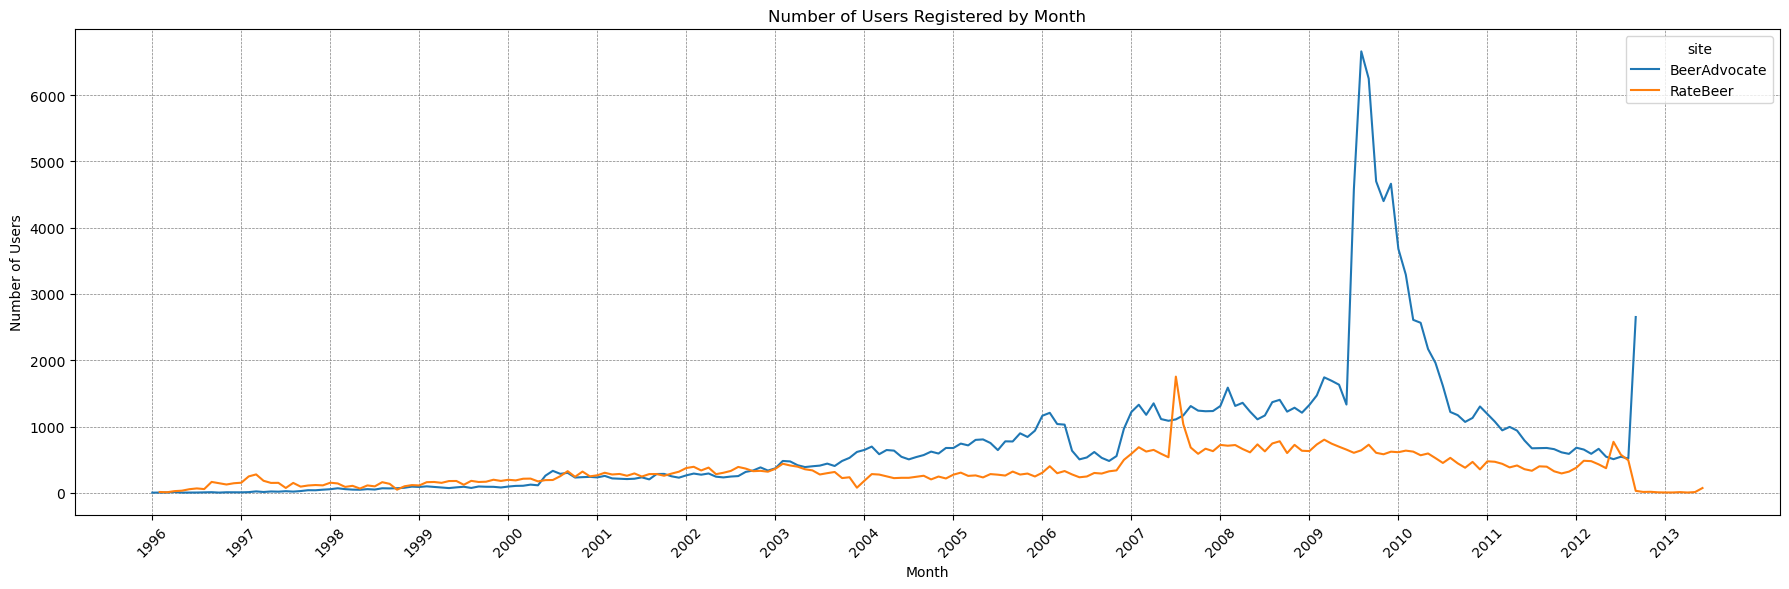

In [10]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot["site"] = "BeerAdvocate"
rb_users_plot["site"] = "RateBeer"

# concatenation of users
df_plot = pd.concat([ba_users_plot, rb_users_plot], ignore_index=True)

# month and year calculation
df_plot['joined'] = pd.to_datetime(df_plot['joined'], format='%d/%m/%Y')
df_plot["month_year"] = df_plot['joined'].dt.to_period('M')
min_year = int(df_plot['joined'].dt.to_period('Y').sort_values().astype(str).iloc[0])
df_plot["month_year"] = df_plot["month_year"].astype(str)
nb_month = df_plot["month_year"].nunique()

# groupby site and month
df_plot = df_plot.groupby(["site","month_year"]).size().reset_index(name='nbr_users')

# figure 
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_plot, x='month_year', y='nbr_users',hue="site")

# title and ticks
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Users Registered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks = np.arange(0,nb_month,12), labels=[year for year in range(min_year,min_year+len(np.arange(0,210,12)))], rotation=45)
plt.tight_layout()

plt.show()

## b) How are each platform’s reviewers distributed around the world over time ? Which platform is dominant in each region ?

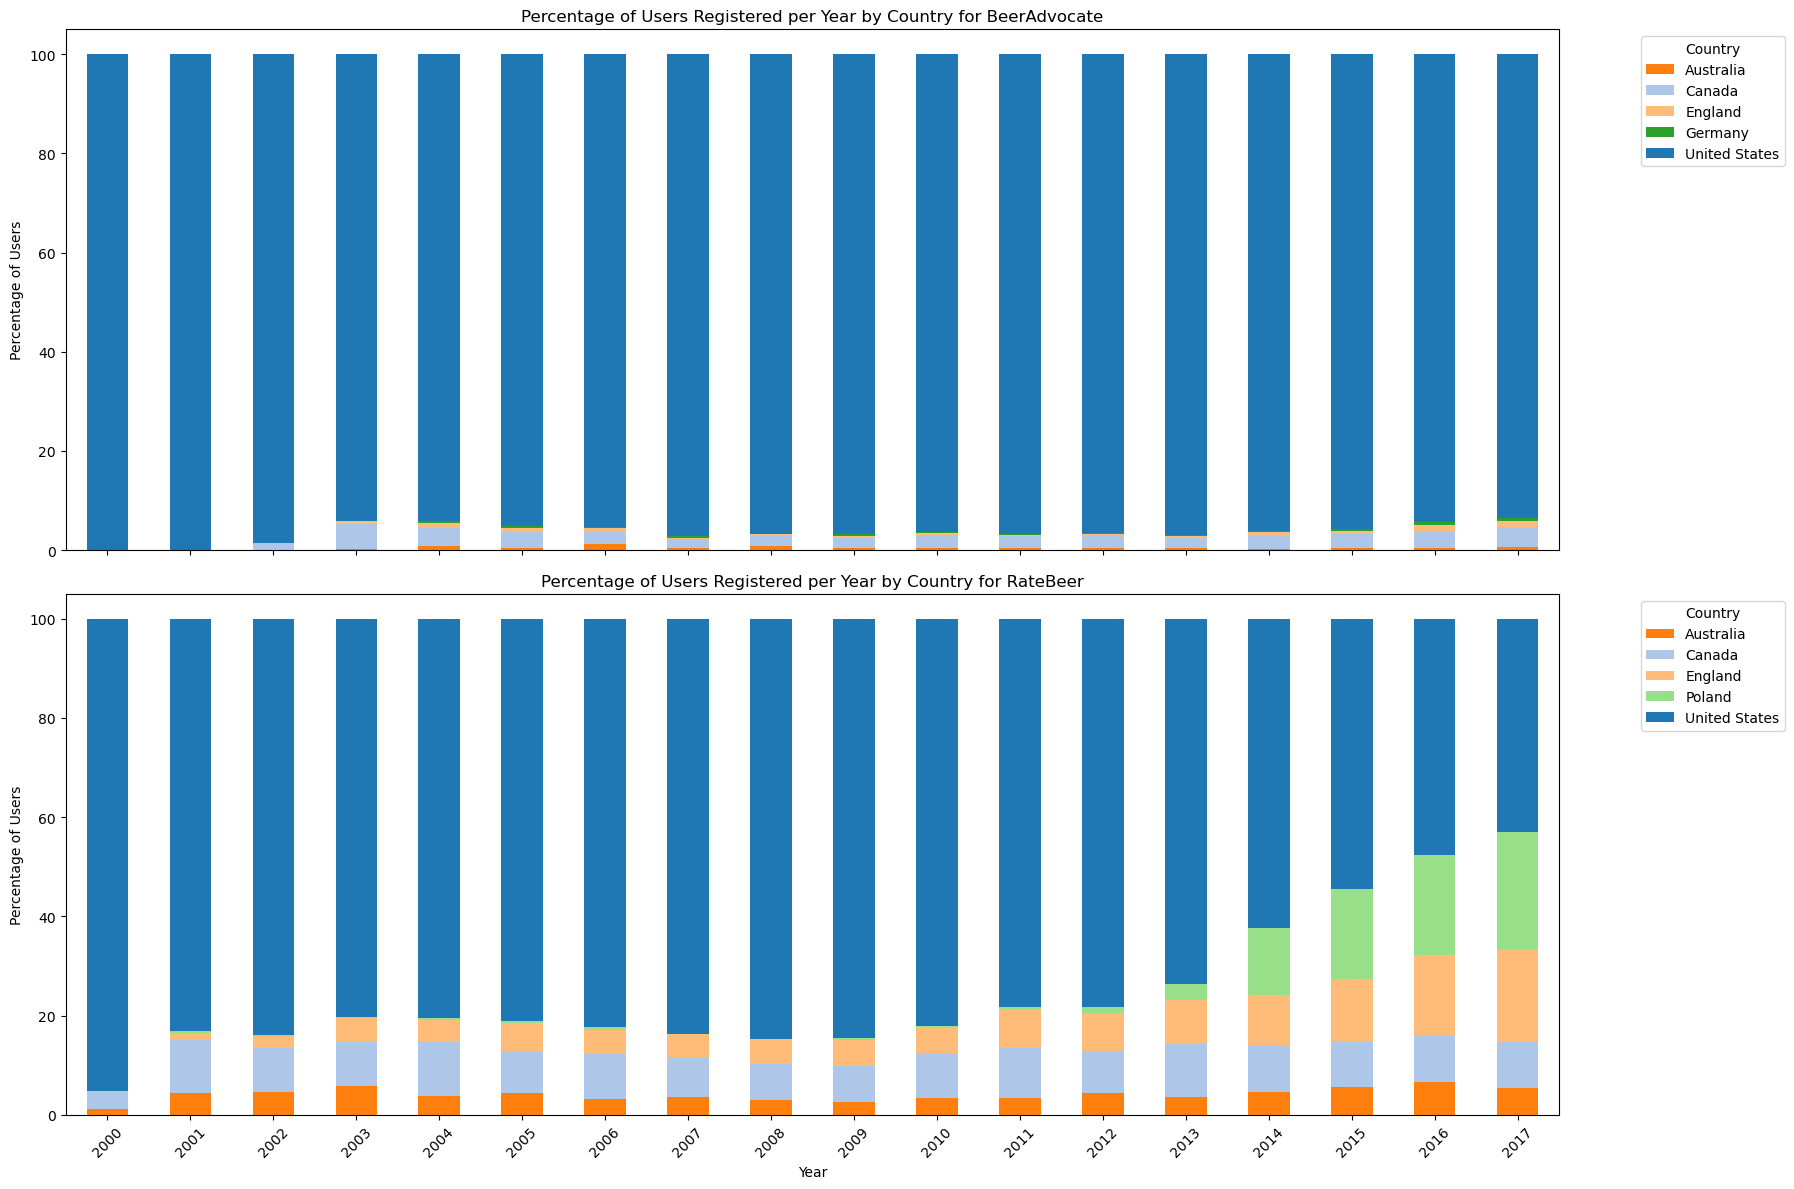

In [11]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot["site"] = "BeerAdvocate"
rb_users_plot["site"] = "RateBeer"

# concatenation of users
df_plot = pd.concat([ba_users_plot, rb_users_plot], ignore_index=True)

# year calculation
df_plot['joined'] = pd.to_datetime(df_plot['joined'], format='%d/%m/%Y')
df_plot["year"] = df_plot['joined'].dt.to_period('Y')

# groupby site, year and country
df_grouped = df_plot.groupby(['site', 'year', 'country']).size().reset_index(name='nbr_users')

# selection of the 5 countries with the most users
top_countries = df_grouped.groupby(['site', 'country'])['nbr_users'].sum()
top_countries = top_countries.groupby(level=0, group_keys=False).nlargest(5).reset_index()
df_top_countries = df_grouped.merge(top_countries[['site', 'country']], on=['site', 'country'])

# compute percentage
nbr_users_pct = df_top_countries.groupby(['site', 'year']).apply(
    lambda group: group['nbr_users'] / group['nbr_users'].sum() * 100,
    include_groups=False
).reset_index(level=[0, 1], drop=True)

df_top_countries['nbr_users_pct'] = nbr_users_pct.values

# color palette
palette = sns.color_palette("tab20", len(df_top_countries['country'].unique()))
country_palette = dict(zip(df_top_countries['country'].unique(), palette))

# figure instance
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# iteration avec the site (BeerAdocate et BeerRate)
for i, (site, data) in enumerate(df_top_countries.groupby('site')):
    # plot 
    data_pivot = data.pivot(index='year', columns='country', values='nbr_users_pct').fillna(0)
    data_pivot.plot(kind='bar', stacked=True, ax=axes[i], color=[country_palette[country] for country in data_pivot.columns])
    axes[i].set_title(f'Percentage of Users Registered per Year by Country for {site}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task 2 : Number of reviews : “On which platform is there the most activity in terms of reviews ?”


## a) How does the number of reviews evolve over time on both platforms ?

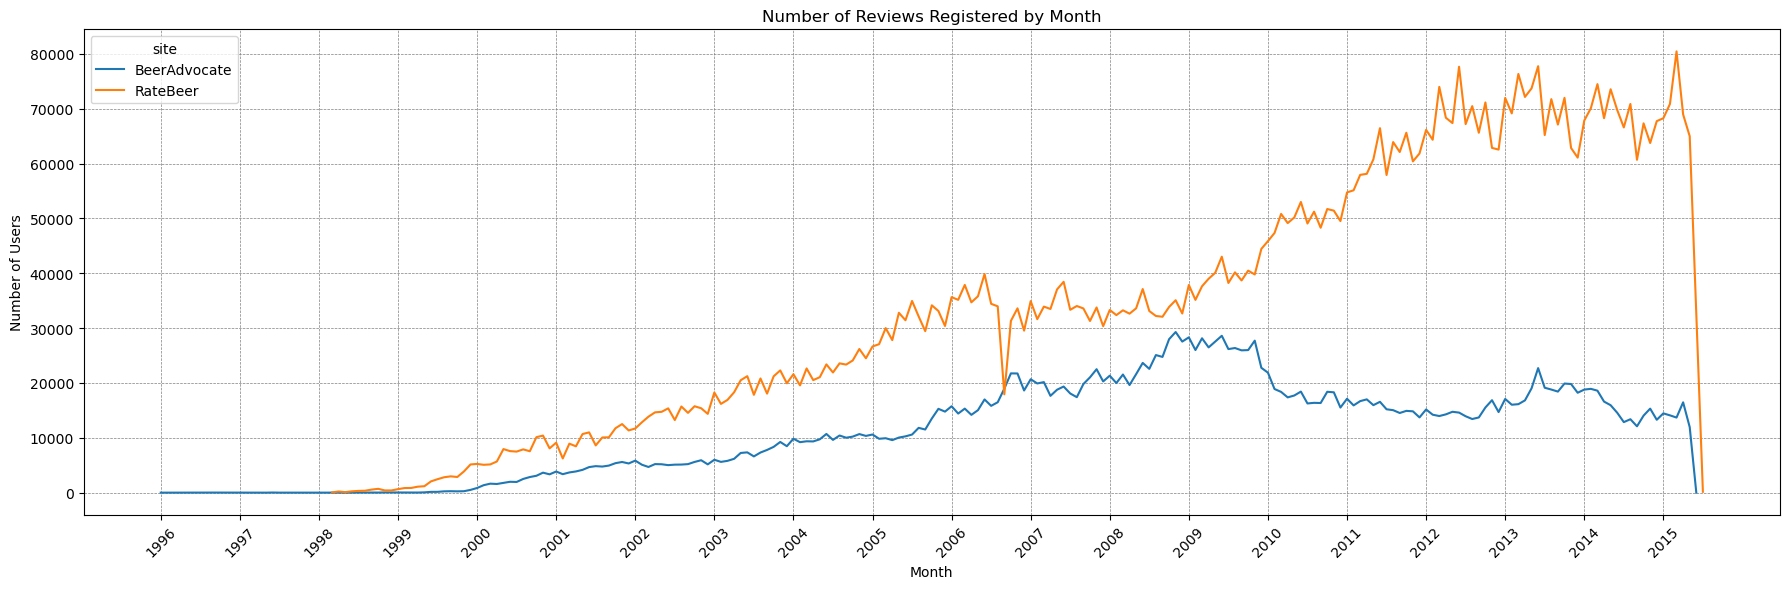

In [12]:
ba_reviews_plot = ba_reviews.copy()
rb_reviews_plot = rb_reviews.copy()
ba_reviews_plot["site"] = "BeerAdvocate"
rb_reviews_plot["site"] = "RateBeer"

# reviews concatenation
df_plot = pd.concat([ba_reviews_plot, rb_reviews_plot], ignore_index=True)

# computation of month and year
df_plot['joined'] = pd.to_datetime(df_plot['date'], format='%d/%m/%Y')
df_plot["month_year"] = df_plot['joined'].dt.to_period('M')
min_year = int(df_plot['joined'].dt.to_period('Y').sort_values().astype(str).iloc[0])
df_plot["month_year"] = df_plot["month_year"].astype(str)
nb_month = df_plot["month_year"].nunique()

# groupby site and month 
df_plot = df_plot.groupby(["site","month_year"]).size().reset_index(name='nbr_users')

# figure
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_plot, x='month_year', y='nbr_users',hue="site")

# title and ticks
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Reviews Registered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks = np.arange(0,nb_month,12), labels=[year for year in range(min_year,min_year+len(np.arange(0,nb_month,12)))], rotation=45)
plt.tight_layout()

plt.show()

## b) How are each platform’s activity distributed around the world over time ? 

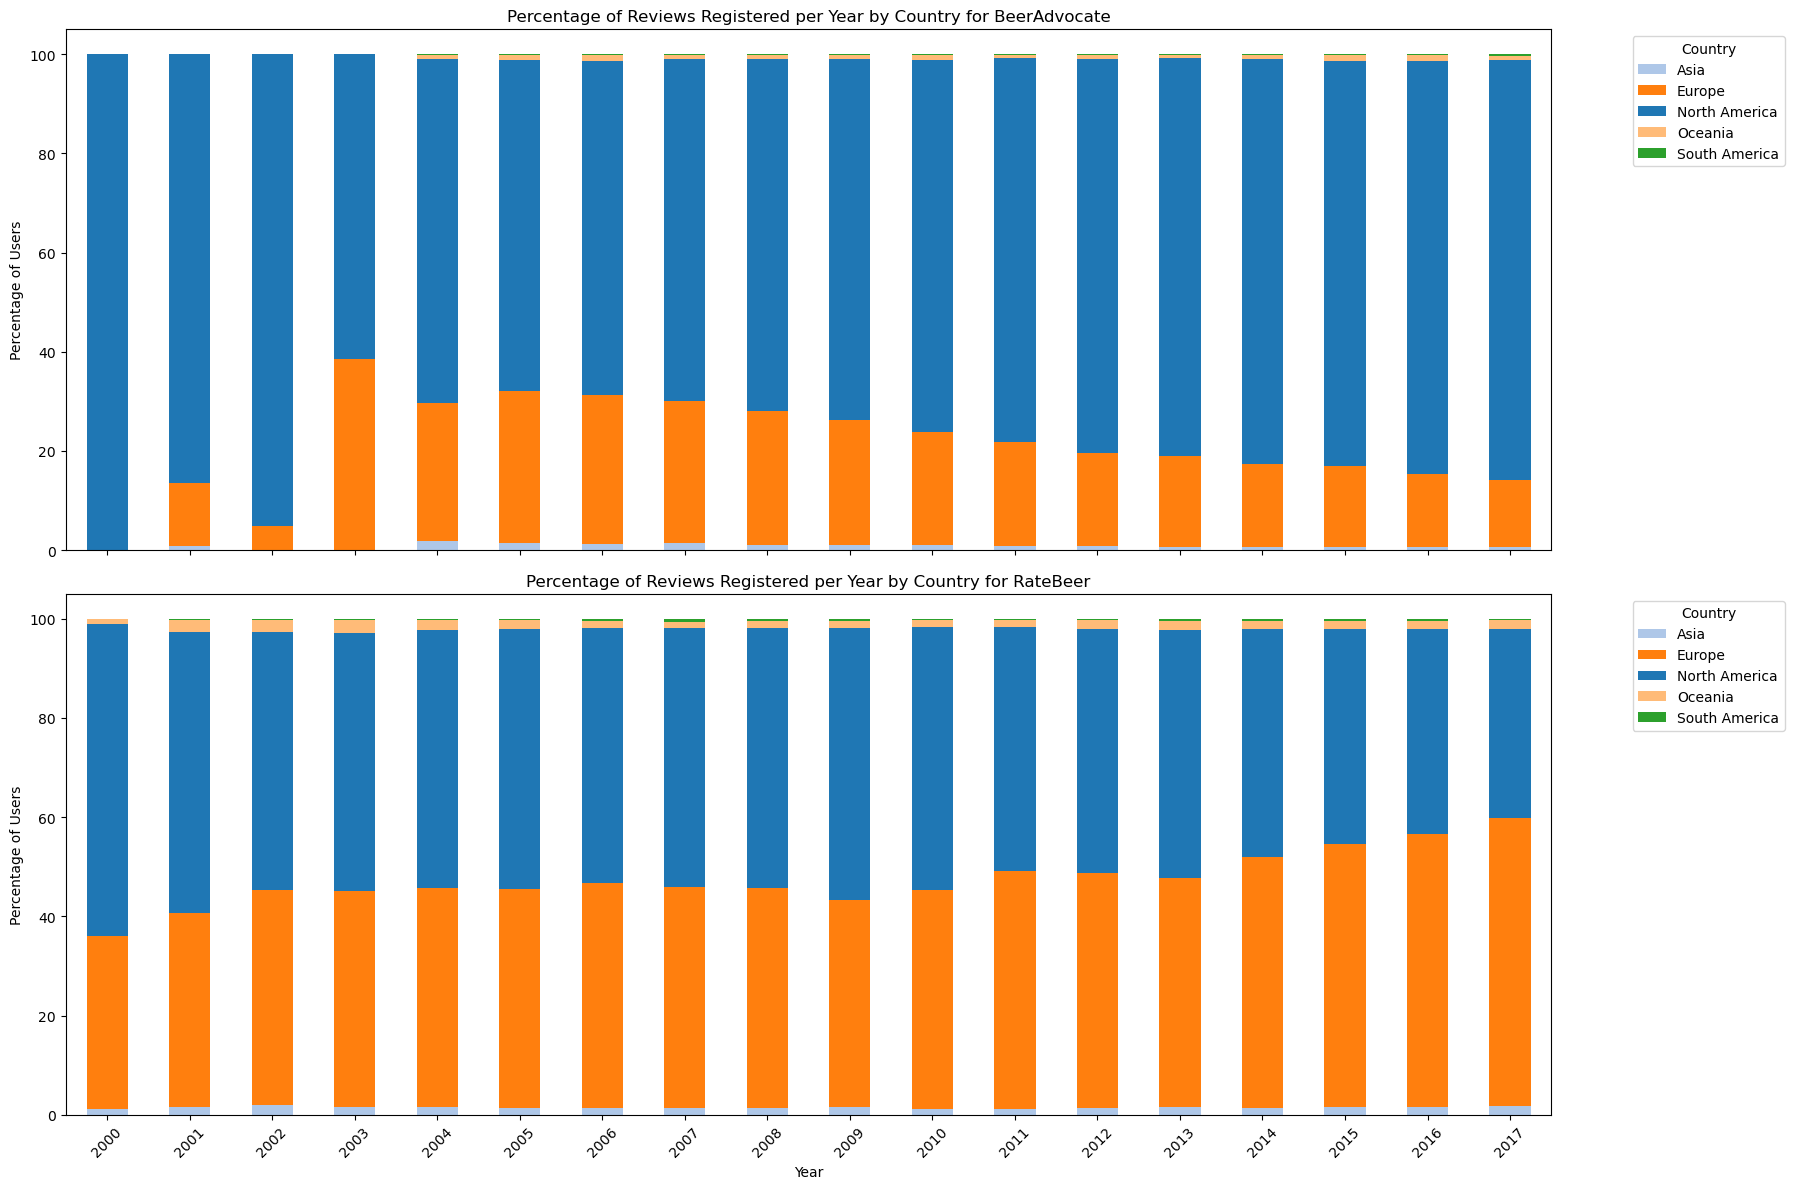

In [13]:
ba_reviews_plot = ba_reviews.copy()
rb_reviews_plot = rb_reviews.copy()
ba_reviews_plot["site"] = "BeerAdvocate"
rb_reviews_plot["site"] = "RateBeer"

# reviews concatenation
df_plot = pd.concat([ba_reviews_plot, rb_reviews_plot], ignore_index=True)

# computation of year
df_plot['joined'] = pd.to_datetime(df_plot['date'], format='%d/%m/%Y')
df_plot["year"] = df_plot['joined'].dt.to_period('Y')

# groupby site and month and continent
df_grouped = df_plot.groupby(['site', 'year', 'continent']).size().reset_index(name='nbr_users')

# selection if the 5 countries with the most users
top_countries = df_grouped.groupby(['site', 'continent'])['nbr_users'].sum()
top_countries = top_countries.groupby(level=0, group_keys=False).nlargest(5).reset_index()

df_top_countries = df_grouped.merge(top_countries[['site', 'continent']], on=['site', 'continent'])

# compute percentage
nbr_users_pct = df_top_countries.groupby(['site', 'year']).apply(
    lambda group: group['nbr_users'] / group['nbr_users'].sum() * 100,
    include_groups=False
).reset_index(level=[0, 1], drop=True)

df_top_countries['nbr_users_pct'] = nbr_users_pct.values

# compute palette
palette = sns.color_palette("tab20", len(df_top_countries['continent'].unique()))
country_palette = dict(zip(df_top_countries['continent'].unique(), palette))

# figure instance
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# iteration avec the site (BeerAdocate et BeerRate)
for i, (site, data) in enumerate(df_top_countries.groupby('site')):
    data_pivot = data.pivot(index='year', columns='continent', values='nbr_users_pct').fillna(0)
    # plot
    data_pivot.plot(kind='bar', stacked=True, ax=axes[i], color=[country_palette[country] for country in data_pivot.columns])
    axes[i].set_title(f'Percentage of Reviews Registered per Year by Country for {site}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ticks
plt.xticks(rotation=45)
plt.tight_layout()

# Affichez le graphique
plt.show()

# Task 3 : User activity : “On which platform are the reviewers most active ?”

## a) How is reviewers’ activity shared out ? What proportion of users have written more than 10 reviews ?

In [14]:
# pourcentage of reviews per active user (a user in considered active if he has > 10 reviews)
df_plot = rb_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(df_plot)

user_id  nbr_reviews      mean
1      100007           73  0.000010
2      100011           46  0.000007
3      100012           30  0.000004
7      100029          237  0.000034
9      100055          665  0.000095
...       ...          ...       ...
70101   99908           26  0.000004
70102   99910          116  0.000017
70112   99959           93  0.000013
70119   99994           10  0.000001
70120   99998          635  0.000091

[17143 rows x 3 columns]

In [15]:
# pourcentage of reviews per active user (a user in considered active if he has > 10 reviews)
df_plot = ba_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(df_plot)

user_id  nbr_reviews      mean
0          --dom--.709199           53  0.000021
8            -rick.912339          194  0.000078
11         -steve-.781156           37  0.000015
16         00trayn.654712           17  0.000007
17        01001111.219143           83  0.000034
...                   ...          ...       ...
62222        zundo.505087           53  0.000021
62233     zx6chris.371552           99  0.000040
62236       zylod.1082979           44  0.000018
62242   zymurgy4all.11427           95  0.000038
62245  zythophile.1101219          184  0.000074

[15792 rows x 3 columns]

# Task 4 : General trends : “What are the top-rated beers, styles, and breweries by year ? And overall ?

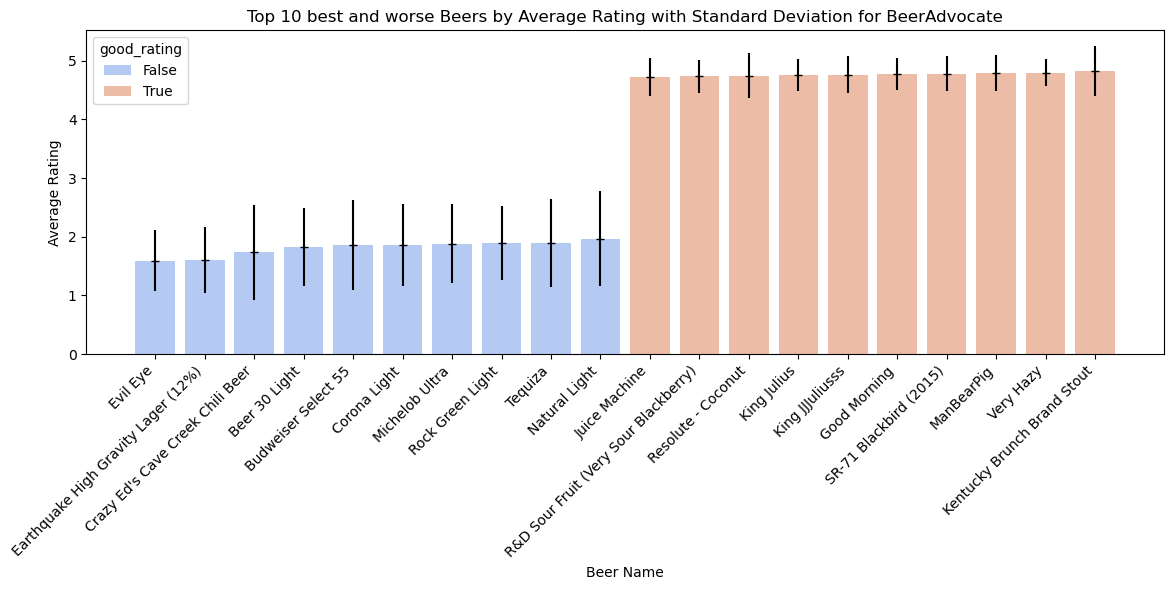

In [16]:
# groupby beername, and computing rating statistics
df_plot = ba_reviews.groupby("beer_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='beer_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['beer_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Beers by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Beer Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_20420\3739893649.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
C:\Users\pierr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


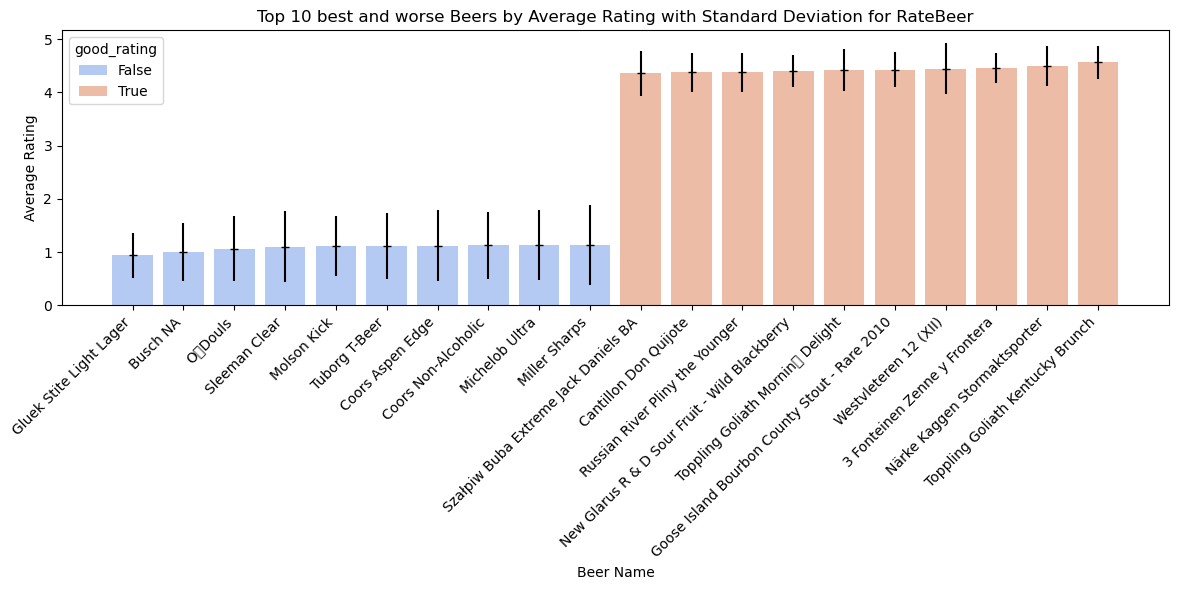

In [17]:
# groupby beername, and computing rating statistics
df_plot = rb_reviews.groupby("beer_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='beer_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['beer_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Beers by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Beer Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

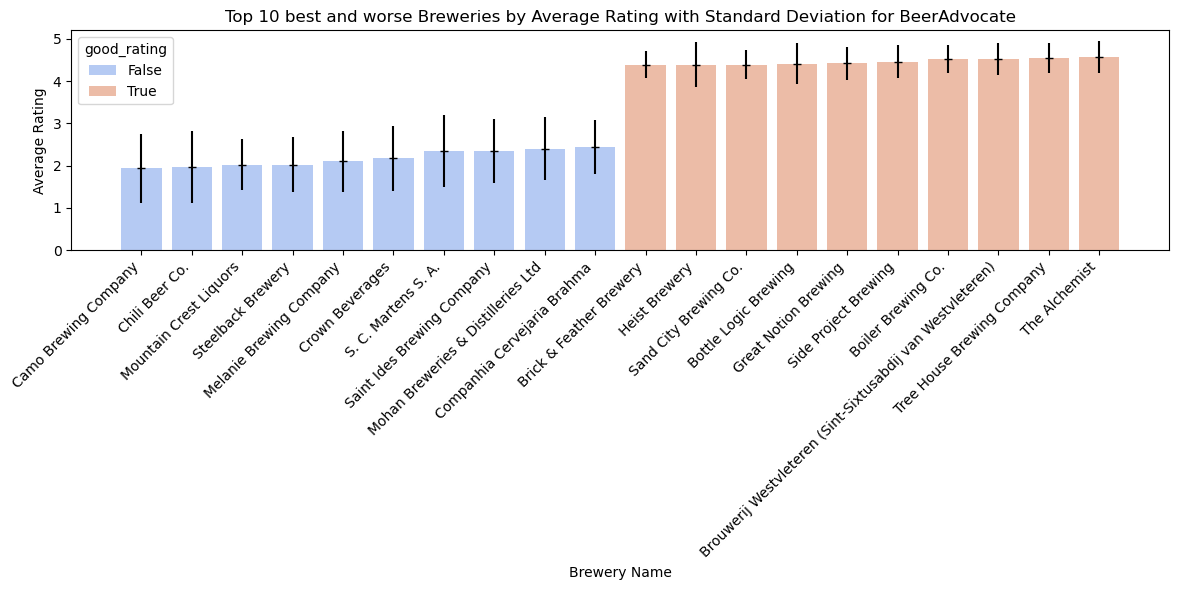

In [18]:
# groupby breweryname, and computing rating statistics
df_plot = ba_reviews.groupby("brewery_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='brewery_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['brewery_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Breweries by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Brewery Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

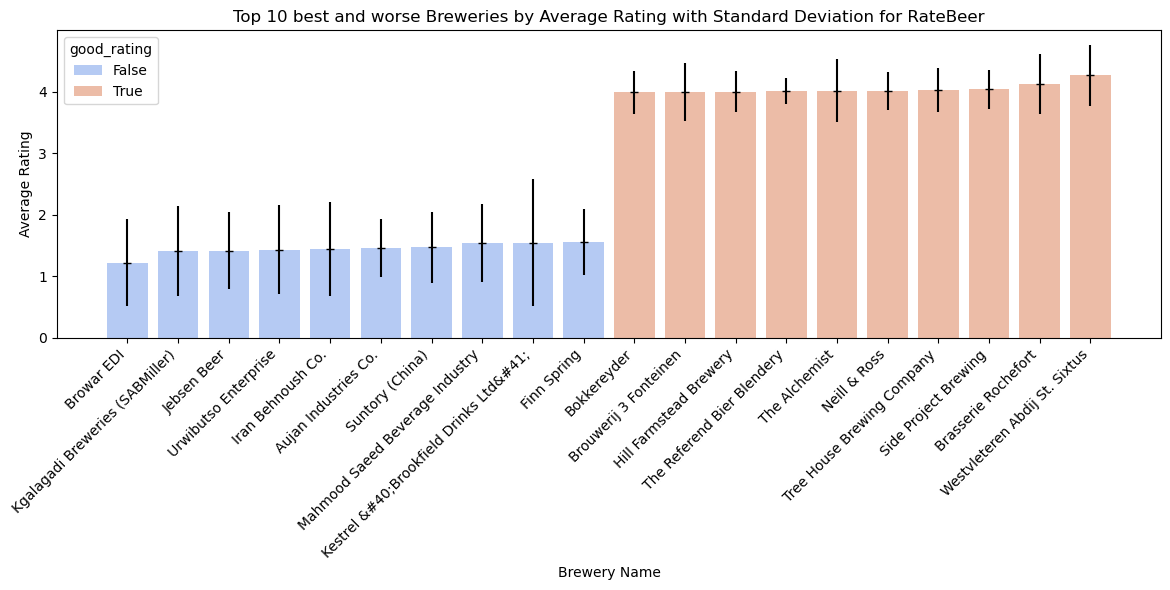

In [19]:
# groupby breweryname, and computing rating statistics
df_plot = rb_reviews.groupby("brewery_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='brewery_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['brewery_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Breweries by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Brewery Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Task 5 : User rating “How do reviewers rate the main types of beer on average on each platform ?”

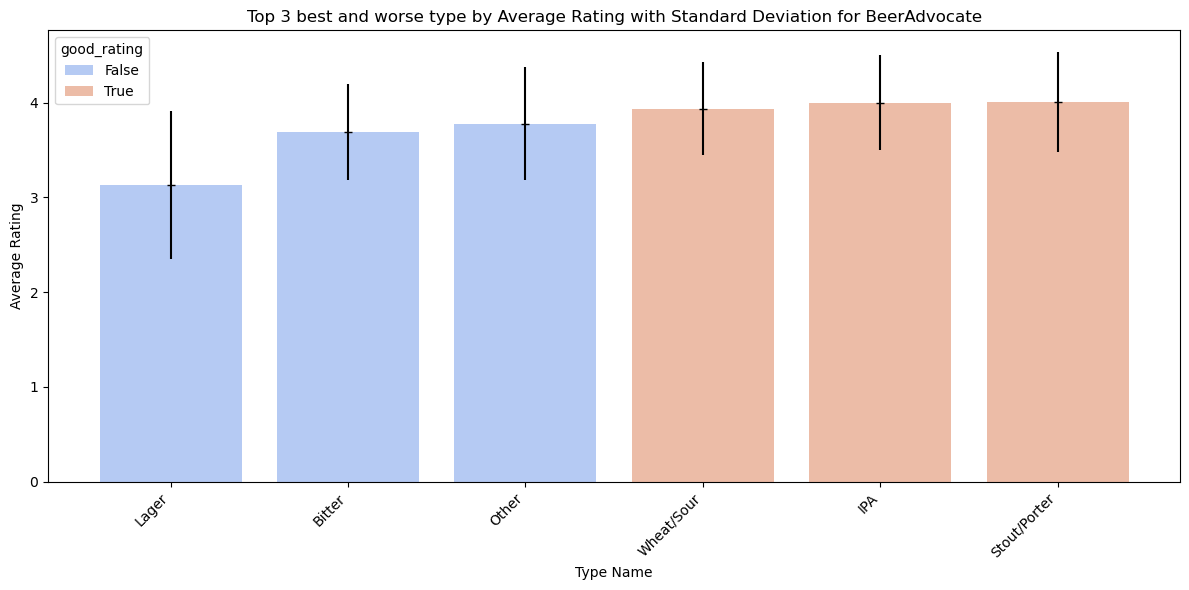

In [20]:
# groupby type, and computing rating statistics
df_plot = ba_reviews.groupby("type").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(3,("rating","mean")),df_plot.nsmallest(3,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='type', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['type'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 3 best and worse type by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Type Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

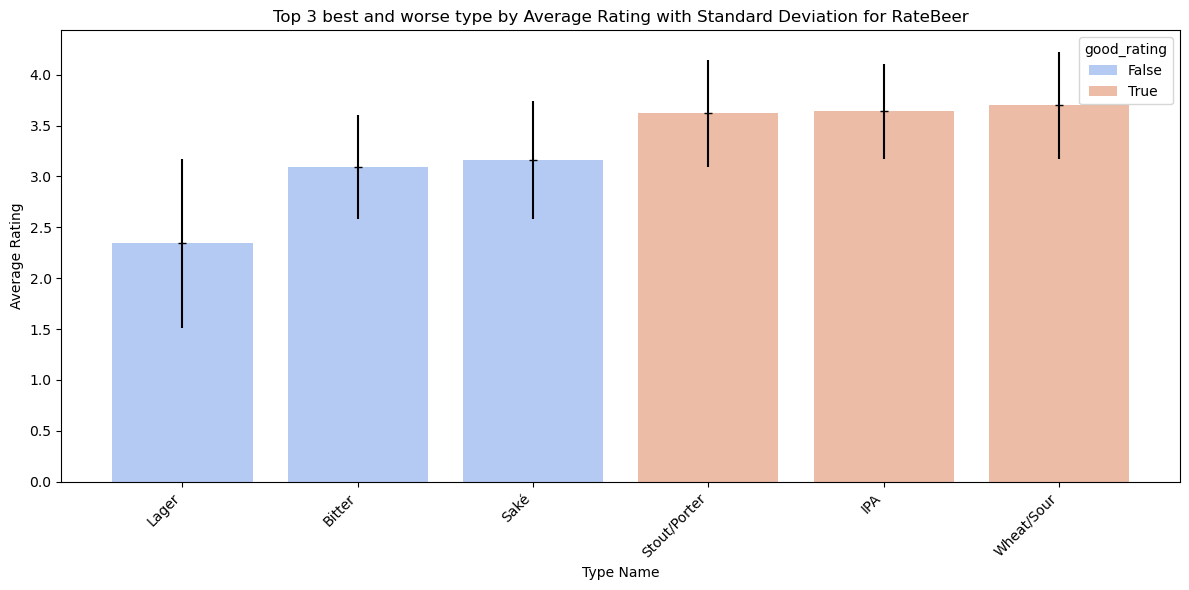

In [21]:
# groupby type, and computing rating statistics
df_plot = rb_reviews.groupby("type").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(3,("rating","mean")),df_plot.nsmallest(3,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='type', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['type'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 3 best and worse type by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Type Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# **PARTIE P3: Criterion 2: Beer Styles: K mean clustering**

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [23]:
# load data
ba_beers = pd.read_csv('generated/new_ba_beers.csv')
display(ba_beers.head(2))

Unnamed: 0  beer_id         beer_name  brewery_id            brewery_name  \
0           0   166064  Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1           1   166065   Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_ratings  nbr_reviews  avg  ba_score  bros_score  abv  \
0  Euro Pale Lager            0            0  NaN       NaN         NaN  4.7   
1  Euro Pale Lager            0            0  NaN       NaN         NaN  3.8   

   avg_computed  zscore  nbr_matched_valid_ratings  avg_matched_valid_ratings  \
0           NaN     NaN                          0                        NaN   
1           NaN     NaN                          0                        NaN   

  continent   type  
0      Asia  Lager  
1      Asia  Lager

In [24]:
#unique_styles = ba_beers['style'].unique()
unique_types = ba_beers['type'].unique()

#display(unique_styles)
display(unique_types)

array(['Lager', 'Stout/Porter', 'Ale', 'Other', 'Bitter', 'IPA',
       'Wheat/Sour'], dtype=object)

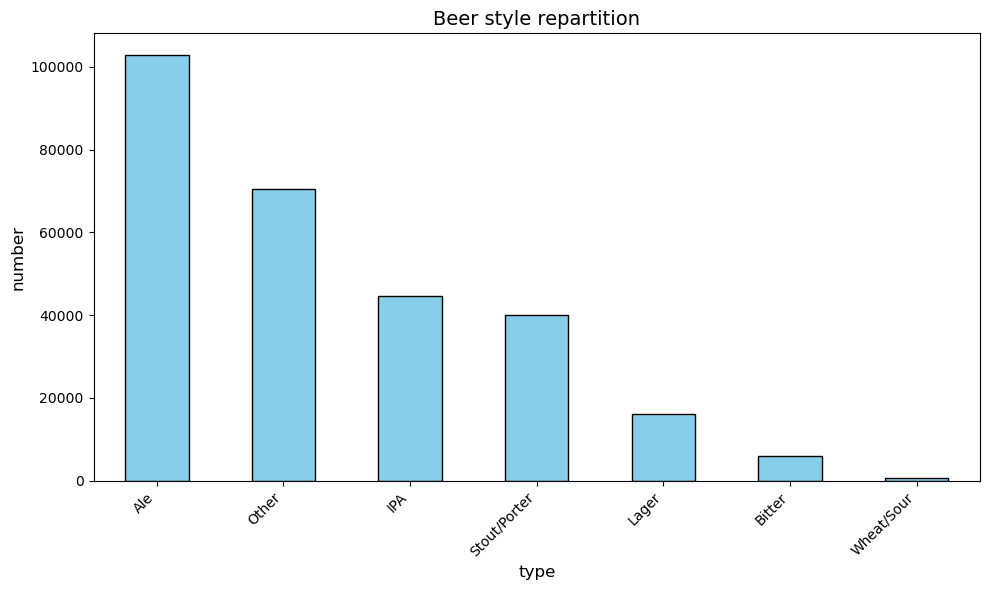

In [25]:
type_counts = ba_beers['type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Beer style repartition', fontsize=14)
plt.xlabel('type', fontsize=12)
plt.ylabel('number', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

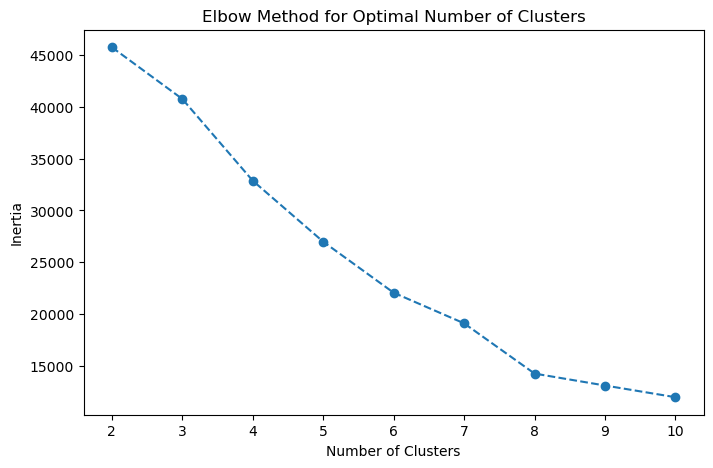

In [26]:
# select features 
features = ["ba_score", "bros_score", "abv", "nbr_ratings", "nbr_reviews", "avg_computed", "continent"]
X = ba_beers[features]
X = pd.get_dummies(X, columns=["continent"], drop_first=True)
X = X.dropna() #drop

# normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# determine optimal number of clusters (elbow method)
inertia = []
range_n_clusters = range(2, 11)  # Test 2 to 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

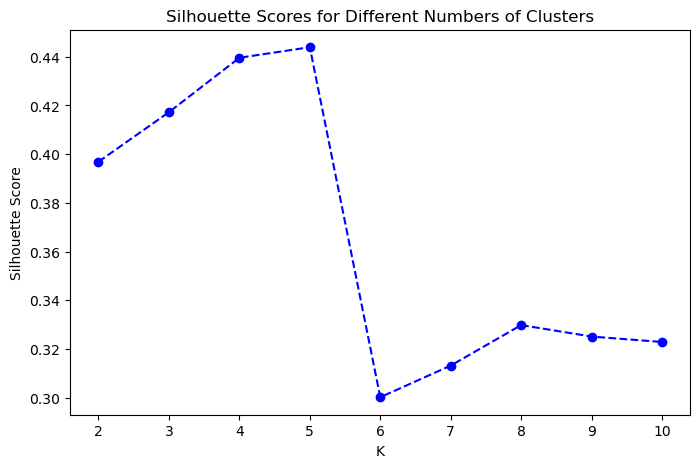

Silhouette Score: 0.3228215524872736


In [27]:
silhouettes = []

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(scaled_features)
    # Get the Silhouette score
    score = silhouette_score(scaled_features, labels)
    silhouettes.append({"k": k, "score": score})

# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(silhouettes.k, silhouettes.score, marker='o', linestyle='--', color='b')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {silhouette_avg}")

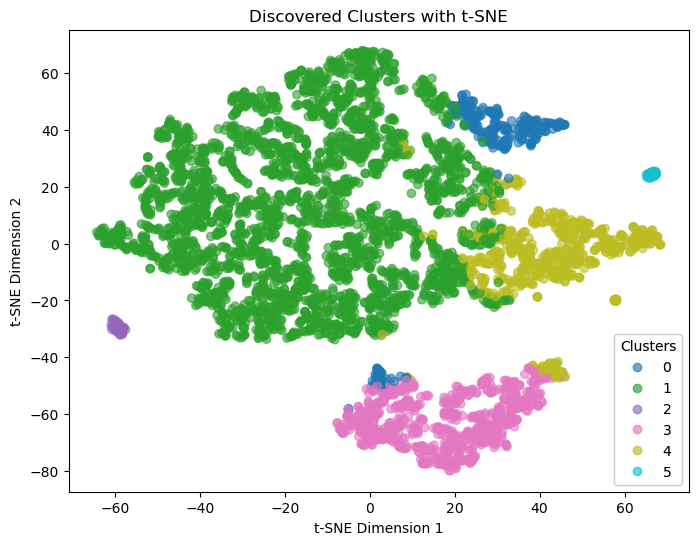

ba_score  bros_score       abv  nbr_ratings  nbr_reviews  \
Cluster                                                              
0        90.810078   92.558140  7.659109  4954.635659  1536.294574   
1        85.325972   87.569207  6.873851   359.853810   128.560809   
2        72.636364   74.045455  5.190909   440.477273   187.454545   
3        84.349931   86.845090  6.415989   449.300138   214.665284   
4        73.799378   68.213064  5.213764   488.920684   175.922240   
5        78.900000   73.600000  5.396667   223.400000   109.733333   

         avg_computed Majority Continent Majority Type  
Cluster                                                 
0            4.072686      North America           Ale  
1            3.804929      North America           Ale  
2            2.970944               Asia         Lager  
3            3.725720             Europe         Other  
4            3.007983      North America           Ale  
5            3.349144            Oceania           Ale

In [28]:
# compute t-SNE to reduce dimensions
beer_scaled_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(scaled_features)

# fit K-Means with optimal clusters
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# plot the t-SNE-transformed data
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(beer_scaled_reduced_tsne[:, 0], beer_scaled_reduced_tsne[:, 1], 
                     c=cluster_labels, alpha=0.6, cmap='tab10')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title("Discovered Clusters with t-SNE")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
plt.show()


# recap in dataframe
ba_beers_clustered = ba_beers.loc[X.index].copy()  
ba_beers_clustered['Cluster'] = cluster_labels
numeric_features = ["ba_score", "bros_score", "abv", "nbr_ratings", "nbr_reviews", "avg_computed"]
cluster_means = ba_beers_clustered.groupby('Cluster')[numeric_features].mean()

continent_majority = (
    ba_beers_clustered.groupby('Cluster')['continent']
    .apply(lambda x: x.mode()[0]) 
    .rename('Majority Continent')
)
type_majority = (
    ba_beers_clustered.groupby('Cluster')['type']
    .apply(lambda x: x.mode()[0])  # Le mode donne le type majoritaire
    .rename('Majority Type')  # Renommer pour plus de clarté
)

cluster_summary = cluster_means.join(continent_majority).join(type_majority)
display(cluster_summary)

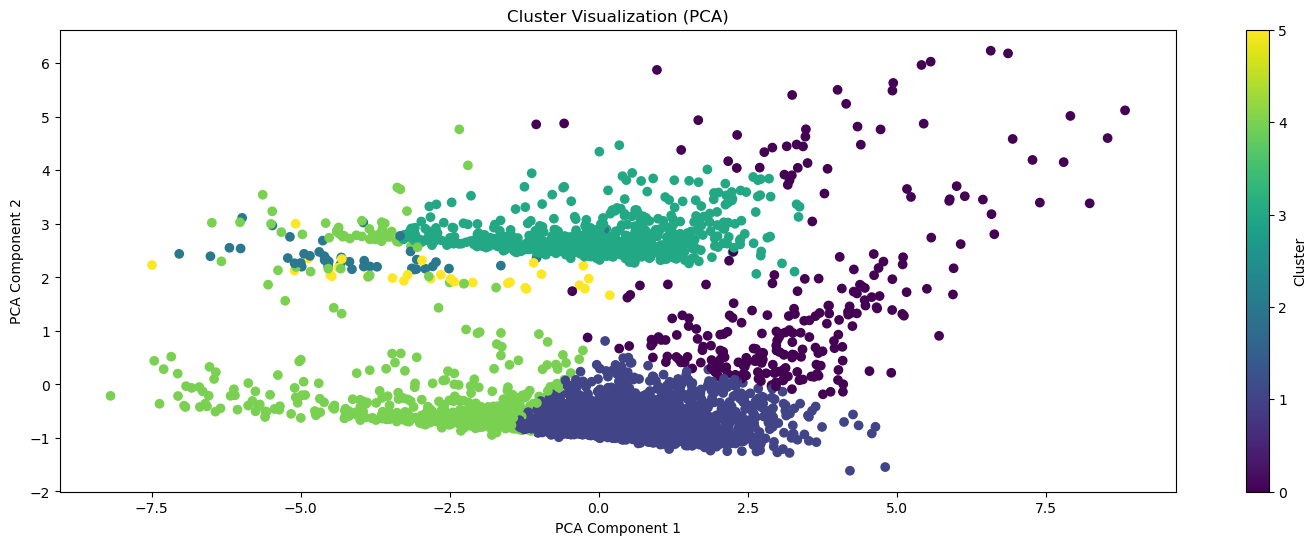

In [29]:
# Optional: Visualize Clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (PCA)')
plt.show()

In [30]:
selected_columns = ["ba_score", "abv", "nbr_ratings", "nbr_reviews", "avg_computed", "continent", "type"]
seeds = ba_beers[selected_columns] #280823 lines
seeds = seeds.dropna().reset_index(drop=True) #57430

seeds['type_encoded'] = pd.Categorical(seeds['type']).codes
type_mapping = dict(enumerate(pd.Categorical(seeds['type']).categories))
display(type_mapping)

seeds_features = seeds.drop(columns=["type", "type_encoded"])
seeds_features.head(3)

# abv, continent

{0: 'Ale',
 1: 'Bitter',
 2: 'IPA',
 3: 'Lager',
 4: 'Other',
 5: 'Stout/Porter',
 6: 'Wheat/Sour'}

ba_score  abv  nbr_ratings  nbr_reviews  avg_computed continent
0      80.0  4.8           75           59      3.439867    Europe
1      82.0  4.2           64           48      3.556094    Europe
2      77.0  3.8          131           82      3.286260    Europe

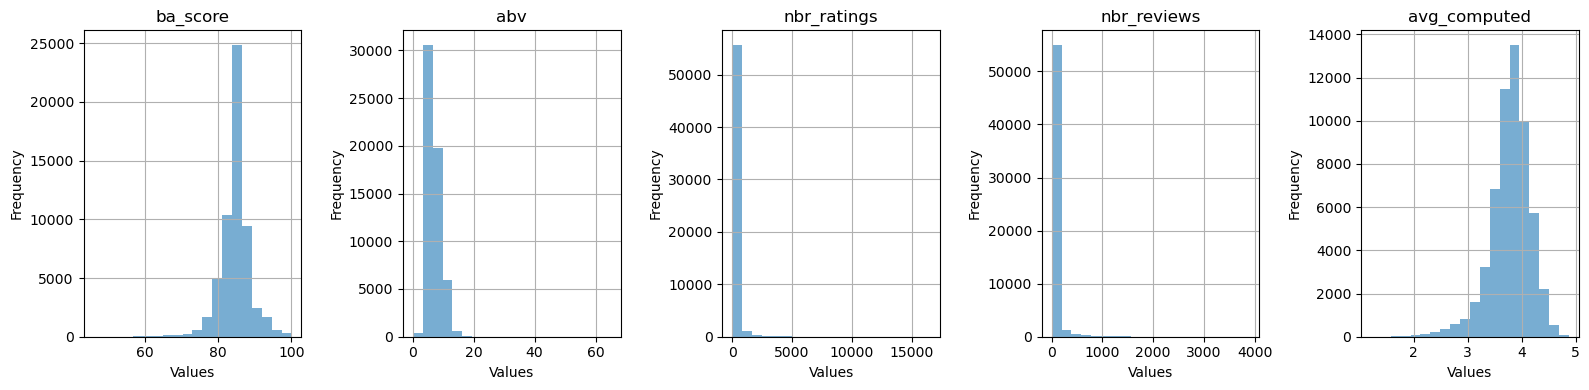

<Figure size 1800x600 with 0 Axes>

In [31]:
columns_to_plot = ["ba_score", "abv", "nbr_ratings", "nbr_reviews", "avg_computed"]

fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(16, 4), sharey=False)

for idx, column in enumerate(columns_to_plot):
    seeds_features[column].hist(bins=20, ax=axs[idx], alpha=0.6)
    axs[idx].set_title(column)
    axs[idx].set_xlabel("Values")
    axs[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
plt.tight_layout()

In [32]:
seeds_features = pd.get_dummies(seeds_features, columns=["continent"], drop_first=True)
scaled_features = StandardScaler().fit(seeds_features).transform(seeds_features)
print("Scaled sample: %s" %scaled_features[0])

Scaled sample: [-1.1452285  -0.92829434 -0.12173658  0.11929854 -0.91851421 -0.07648396
  2.58018087 -2.35298436 -0.10848243 -0.06437285]


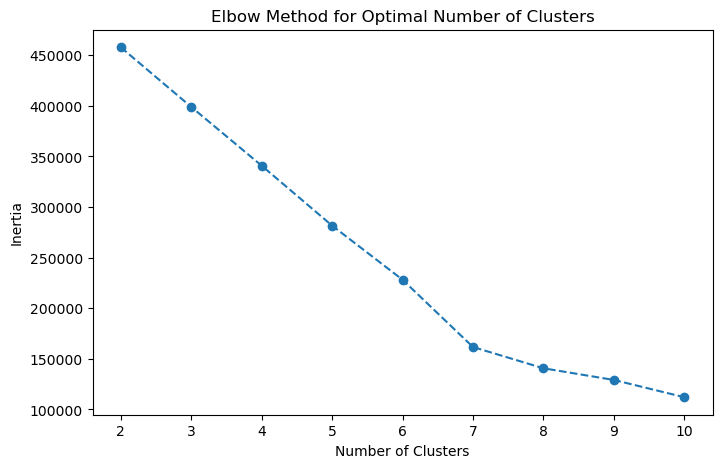

In [33]:
# determine optimal number of clusters (elbow method)
inertia = []
range_n_clusters = range(2, 11)  # Test 2 to 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=9)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [34]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=9).fit_transform(scaled_features)

Text(0.5, 1.0, 'Discovered clusters')

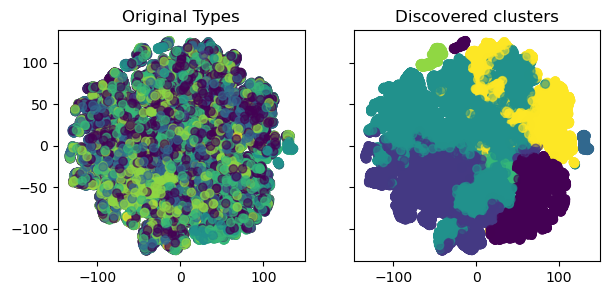

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=seeds.type_encoded, alpha=0.6)
axs[0].set_title("Original Types")


labels = KMeans(n_clusters=7).fit_predict(scaled_features)

axs[1].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[1].set_title("Discovered clusters")

Que faire avec les random state, essayer d'enlever continent


# New Task 4 - User activity : What are the behaviors of reviewers on each platform?

In [42]:
ba_reviews_per_user = ba_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
rb_reviews_per_user = rb_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
ba_reviews_per_user['user_id'] = ba_reviews_per_user['user_id'].astype(str)
rb_reviews_per_user['user_id'] = rb_reviews_per_user['user_id'].astype(str)
display(ba_reviews.head(2))
display(rb_reviews.head(2))
display(ba_reviews_per_user.head(2))
display(rb_reviews_per_user.head(2))

beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date    user_name  \
0       37262   Euro Pale Lager  4.5  20/08/2015      nmann08   
1       10093  English Pale Ale  4.5  20/02/2009  StJamesGate   

              user_id  appearance  aroma  palate  taste  overall  rating  \
0      nmann08.184925        3.25   2.75    3.25   2.75      3.0    2.88   
1  stjamesgate.163714        3.00   3.50    3.50   4.00      3.5    3.67   

  continent   type  
0    Africa  Lager  
1    Europe    Ale

beer_name  beer_id brewery_name  brewery_id       style  abv  \
0    33 Export (Gabon)   410549      Sobraga        3198  Pale Lager  5.0   
1  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   

         date     user_name user_id  appearance  aroma  palate  taste  \
0  26/04/2016       Manslow  175852           2      4       2      4   
1  17/02/2017  MAGICuenca91  442761           2      3       2      4   

   overall  rating continent   type  
0        8     2.0    Africa  Lager  
1        8     1.9    Africa  Lager

user_id  nbr_reviews
0    --dom--.709199           53
1  --weezl--.789708            3

user_id  nbr_reviews
0      10            5
1  100007           73

In [40]:
# mean_yearly_reviews

nan_in_column = ba_users['nbr_reviews'].isna().sum()
print(f"NaN values in 'nbr_reviews': {nan_in_column}")
nan_in_column = ba_users['joined'].isna().sum()
print(f"NaN values in 'joined': {nan_in_column}")

ba_users_joined = ba_users.dropna(subset=['joined'])
rb_users_joined = rb_users.dropna(subset=['joined'])
#display(rb_users_joined)

ba_users_joined['user_id'] = ba_users_joined['user_id'].astype(str)
rb_users_joined['user_id'] = rb_users_joined['user_id'].astype(str)

#display(rb_users_joined)

#ba_users_joined = ba_users_joined.merge(ba_reviews_per_user, on='user_id', how='left')
rb_users_joined = rb_users_joined.merge(rb_reviews_per_user, on='user_id', how='left')
display(ba_users_joined)
display(rb_users_joined)

ba_users_joined['year_joined'] = ba_users_joined['joined'].str[-4:].astype(int)
rb_users_joined['year_joined'] = rb_users_joined['joined'].str[-4:].astype(int)

max_year = ba_users_joined['year_joined'].max()
print(f"Last year for data (ba): {max_year}")
ba_users_joined['mean_yearly_reviews'] = ba_users_joined['nbr_reviews']/(max_year+1-ba_users_joined['year_joined'])

max_year = rb_users_joined['year_joined'].max()
print(f"Last year for data (rb): {max_year}")
rb_users_joined['mean_yearly_reviews'] = rb_users_joined['nbr_reviews']/(max_year+1-rb_users_joined['year_joined'])

NaN values in 'nbr_reviews': 0
NaN values in 'joined': 2652


C:\Users\pierr\AppData\Local\Temp\ipykernel_20420\4159028896.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_users_joined['user_id'] = ba_users_joined['user_id'].astype(str)
C:\Users\pierr\AppData\Local\Temp\ipykernel_20420\4159028896.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_users_joined['user_id'] = rb_users_joined['user_id'].astype(str)


Unnamed: 0  nbr_ratings  nbr_reviews                user_id  \
0                0         7820          465         nmann08.184925   
1                1         2521         2504     stjamesgate.163714   
2                2         1797         1143          mdagnew.19527   
3                3           31           31  helloloser12345.10867   
4                4          604          604        cypressbob.3708   
...            ...          ...          ...                    ...   
153699      153699            1            1         everman.532342   
153700      153700            1            1      justin0001.352175   
153701      153701            1            0        kyungsup.982216   
153702      153702            1            1          joetex.800347   
153703      153703            1            1      alexmatt86.313751   

              user_name      joined                   location  \
0               nmann08  07/01/2008  United States, Washington   
1           StJamesGate  08/10/2007    United States, New York   
2               mdagnew  18/05/2005           Northern Ireland   
3       helloloser12345  25/11/2004           Northern Ireland   
4            cypressbob  20/11/2003           Northern Ireland   
...                 ...         ...                        ...   
153699          Everman  30/11/2010  United States, California   
153700       Justin0001  23/07/2009  United States, California   
153701         Kyungsup  02/05/2015                        NaN   
153702           JoeTex  16/05/2014  United States, California   
153703       Alexmatt86  29/03/2009  United States, California   

                 country      continent  
0          United States  North America  
1          United States  North America  
2       Northern Ireland         Europe  
3       Northern Ireland         Europe  
4       Northern Ireland         Europe  
...                  ...            ...  
153699     United States  North America  
153700     United States  North America  
153701               NaN        Unknown  
153702     United States  North America  
153703     United States  North America  

[151052 rows x 9 columns]

Unnamed: 0  nbr_ratings user_id     user_name      joined  \
0               0         1890  175852       Manslow  20/05/2012   
1               1           89  442761  MAGICuenca91  10/01/2017   
2               2          169  288889        Sibarh  16/11/2013   
3               3         3371  250510       fombe89  22/03/2013   
4               4        13043  122778    kevnic2008  02/02/2011   
...           ...          ...     ...           ...         ...   
70139       70169            1  134893   stamfordbus  05/09/2011   
70140       70170            1  327816      fobia405  25/07/2014   
70141       70171            1  183139        junkin  16/06/2012   
70142       70172            3   82020      klesidra  24/09/2008   
70143       70173            1   48123     cathrinea  15/01/2007   

                      location        country      continent  nbr_reviews  
0                       Poland         Poland         Europe       1612.0  
1                        Spain          Spain         Europe         81.0  
2                       Poland         Poland         Europe        162.0  
3                        Spain          Spain         Europe       3056.0  
4                      Germany        Germany         Europe      11866.0  
...                        ...            ...            ...          ...  
70139                  England        England         Europe          1.0  
70140                  Belgium        Belgium         Europe          1.0  
70141                      NaN            NaN        Unknown          1.0  
70142                 Slovenia       Slovenia         Europe          3.0  
70143  United States, Virginia  United States  North America          1.0  

[70144 rows x 9 columns]

Last year for data (ba): 2017
Last year for data (rb): 2017


C:\Users\pierr\AppData\Local\Temp\ipykernel_20420\4159028896.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_users_joined['year_joined'] = ba_users_joined['joined'].str[-4:].astype(int)
C:\Users\pierr\AppData\Local\Temp\ipykernel_20420\4159028896.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_users_joined['mean_yearly_reviews'] = ba_users_joined['nbr_reviews']/(max_year+1-ba_users_joined['year_joined'])


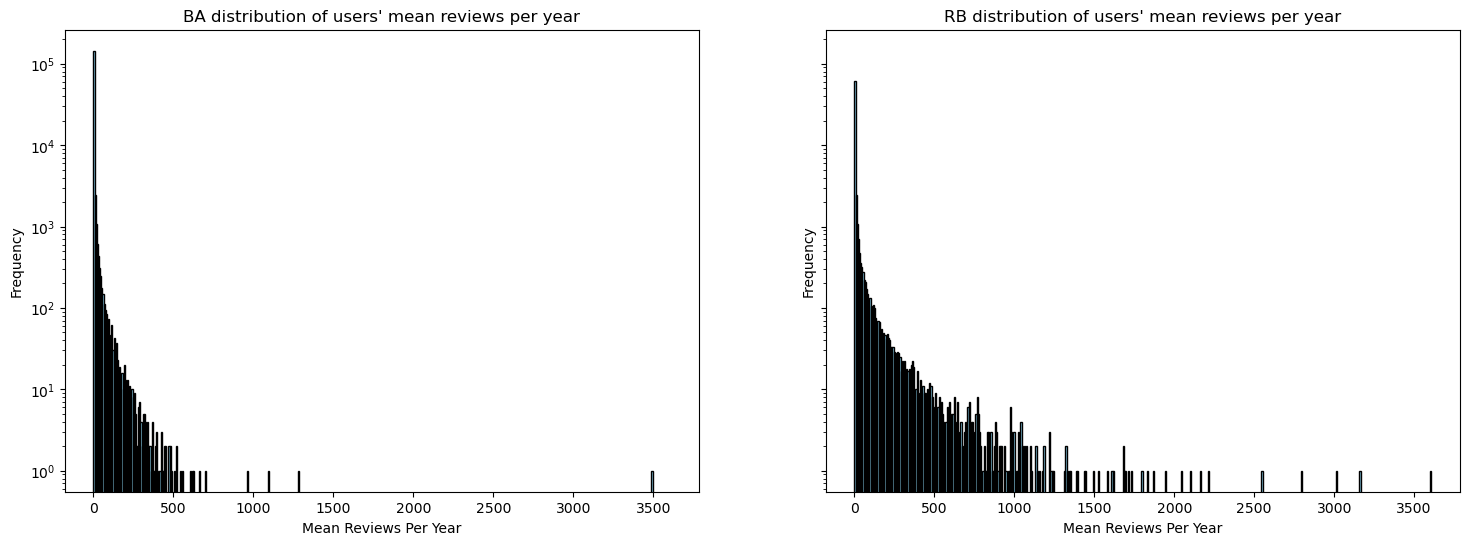

In [41]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
axs[0].hist(ba_users_joined['mean_yearly_reviews'].dropna(), log=True, bins=500, color='skyblue', edgecolor='black')
axs[1].hist(rb_users_joined['mean_yearly_reviews'].dropna(), log=True, bins=500, color='skyblue', edgecolor='black')

axs[0].set_title("BA distribution of users' mean reviews per year")
axs[1].set_title("RB distribution of users' mean reviews per year")
for ax in axs:
    ax.set(xlabel='Mean Reviews Per Year', ylabel='Frequency')
plt.show()

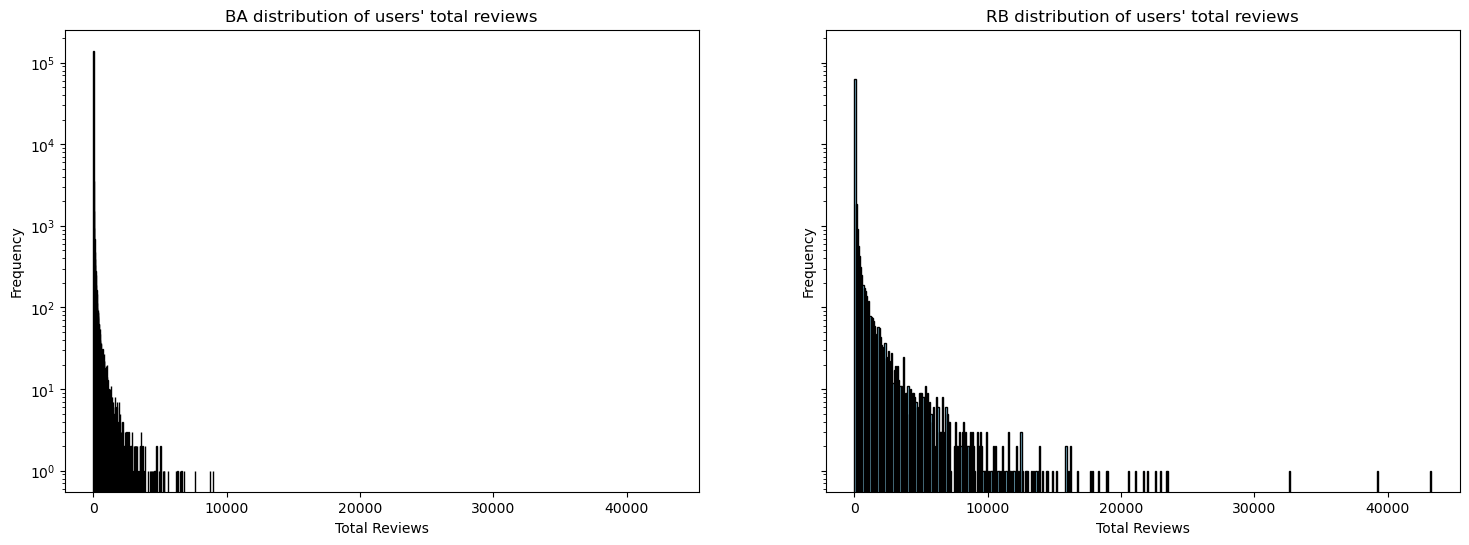

In [43]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
axs[0].hist(ba_users_joined['nbr_reviews'].dropna(), log=True, bins=500, color='skyblue', edgecolor='black')
axs[1].hist(rb_users_joined['nbr_reviews'].dropna(), log=True, bins=500, color='skyblue', edgecolor='black')

axs[0].set_title("BA distribution of users' total reviews")
axs[1].set_title("RB distribution of users' total reviews")
for ax in axs:
    ax.set(xlabel='Total Reviews', ylabel='Frequency')
plt.show()

In [44]:
print(f"BeerAdvocate total reviews per user description : \n{ba_users_joined['nbr_reviews'].describe()}\n")
print(f"RateBeer total reviews per user description : \n{rb_users_joined['nbr_reviews'].describe()}\n")

print(f"BeerAdvocate yearly reviews per user description : \n{ba_users_joined['mean_yearly_reviews'].describe()}\n")
print(f"RateBeer yearly reviews per user description : \n{rb_users_joined['mean_yearly_reviews'].describe()}\n")

BeerAdvocate total reviews per user description : 
count    151052.000000
mean         16.558629
std         138.936010
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8970.000000
Name: nbr_reviews, dtype: float64

RateBeer total reviews per user description : 
count    70142.000000
mean       101.524850
std        703.529084
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max      43251.000000
Name: nbr_reviews, dtype: float64

BeerAdvocate yearly reviews per user description : 
count    151052.000000
mean          2.048558
std          17.570182
min           0.000000
25%           0.000000
50%           0.000000
75%           0.333333
max        3496.000000
Name: mean_yearly_reviews, dtype: float64

RateBeer yearly reviews per user description : 
count    70142.000000
mean        12.641796
std         73.555286
min          0.055556
25%          0.200000
50%          0.500000
75%          

**Note:** RateBeer have a half the number of users of BeerAdvocate but their users seem significantly more active

In [45]:
# compute diversity of beer types and styles (count of beer styles) in reviews for each user

ba_type_diversity = (ba_reviews.groupby("user_id"))['type'].nunique().reset_index(name="type_diversity")
ba_style_diversity = (ba_reviews.groupby("user_id"))['style'].nunique().reset_index(name="style_diversity")

rb_type_diversity = (rb_reviews.groupby("user_id"))['type'].nunique().reset_index(name="type_diversity")
rb_style_diversity = (rb_reviews.groupby("user_id"))['style'].nunique().reset_index(name="style_diversity")

In [46]:
# style and type diversity
ba_users_joined = ba_users_joined.merge(ba_type_diversity, on='user_id', how='left').fillna(0)
ba_users_joined = ba_users_joined.merge(ba_style_diversity, on='user_id', how='left').fillna(0)

rb_users_joined = rb_users_joined.merge(rb_type_diversity, on='user_id', how='left').fillna(0)
rb_users_joined = rb_users_joined.merge(rb_style_diversity, on='user_id', how='left').fillna(0)

display(ba_users_joined)
display(rb_users_joined)

Unnamed: 0  nbr_ratings  nbr_reviews                user_id  \
0                0         7820          465         nmann08.184925   
1                1         2521         2504     stjamesgate.163714   
2                2         1797         1143          mdagnew.19527   
3                3           31           31  helloloser12345.10867   
4                4          604          604        cypressbob.3708   
...            ...          ...          ...                    ...   
151047      153699            1            1         everman.532342   
151048      153700            1            1      justin0001.352175   
151049      153701            1            0        kyungsup.982216   
151050      153702            1            1          joetex.800347   
151051      153703            1            1      alexmatt86.313751   

              user_name      joined                   location  \
0               nmann08  07/01/2008  United States, Washington   
1           StJamesGate  08/10/2007    United States, New York   
2               mdagnew  18/05/2005           Northern Ireland   
3       helloloser12345  25/11/2004           Northern Ireland   
4            cypressbob  20/11/2003           Northern Ireland   
...                 ...         ...                        ...   
151047          Everman  30/11/2010  United States, California   
151048       Justin0001  23/07/2009  United States, California   
151049         Kyungsup  02/05/2015                          0   
151050           JoeTex  16/05/2014  United States, California   
151051       Alexmatt86  29/03/2009  United States, California   

                 country      continent  year_joined  mean_yearly_reviews  \
0          United States  North America         2008            46.500000   
1          United States  North America         2007           227.636364   
2       Northern Ireland         Europe         2005            87.923077   
3       Northern Ireland         Europe         2004             2.214286   
4       Northern Ireland         Europe         2003            40.266667   
...                  ...            ...          ...                  ...   
151047     United States  North America         2010             0.125000   
151048     United States  North America         2009             0.111111   
151049                 0        Unknown         2015             0.000000   
151050     United States  North America         2014             0.250000   
151051     United States  North America         2009             0.111111   

        type_diversity  style_diversity  
0                  7.0             81.0  
1                  7.0             93.0  
2                  6.0             87.0  
3                  5.0             17.0  
4                  6.0             81.0  
...                ...              ...  
151047             1.0              1.0  
151048             1.0              1.0  
151049             0.0              0.0  
151050             1.0              1.0  
151051             1.0              1.0  

[151052 rows x 13 columns]

Unnamed: 0  nbr_ratings user_id     user_name      joined  \
0               0         1890  175852       Manslow  20/05/2012   
1               1           89  442761  MAGICuenca91  10/01/2017   
2               2          169  288889        Sibarh  16/11/2013   
3               3         3371  250510       fombe89  22/03/2013   
4               4        13043  122778    kevnic2008  02/02/2011   
...           ...          ...     ...           ...         ...   
70139       70169            1  134893   stamfordbus  05/09/2011   
70140       70170            1  327816      fobia405  25/07/2014   
70141       70171            1  183139        junkin  16/06/2012   
70142       70172            3   82020      klesidra  24/09/2008   
70143       70173            1   48123     cathrinea  15/01/2007   

                      location        country      continent  nbr_reviews  \
0                       Poland         Poland         Europe       1612.0   
1                        Spain          Spain         Europe         81.0   
2                       Poland         Poland         Europe        162.0   
3                        Spain          Spain         Europe       3056.0   
4                      Germany        Germany         Europe      11866.0   
...                        ...            ...            ...          ...   
70139                  England        England         Europe          1.0   
70140                  Belgium        Belgium         Europe          1.0   
70141                        0              0        Unknown          1.0   
70142                 Slovenia       Slovenia         Europe          3.0   
70143  United States, Virginia  United States  North America          1.0   

       year_joined  mean_yearly_reviews  type_diversity  style_diversity  
0             2012           268.666667             7.0             79.0  
1             2017            81.000000             4.0             21.0  
2             2013            32.400000             5.0             38.0  
3             2013           611.200000             7.0             78.0  
4             2011          1695.142857             7.0             78.0  
...            ...                  ...             ...              ...  
70139         2011             0.142857             1.0              1.0  
70140         2014             0.250000             1.0              1.0  
70141         2012             0.166667             1.0              1.0  
70142         2008             0.300000             2.0              2.0  
70143         2007             0.090909             1.0              1.0  

[70144 rows x 13 columns]

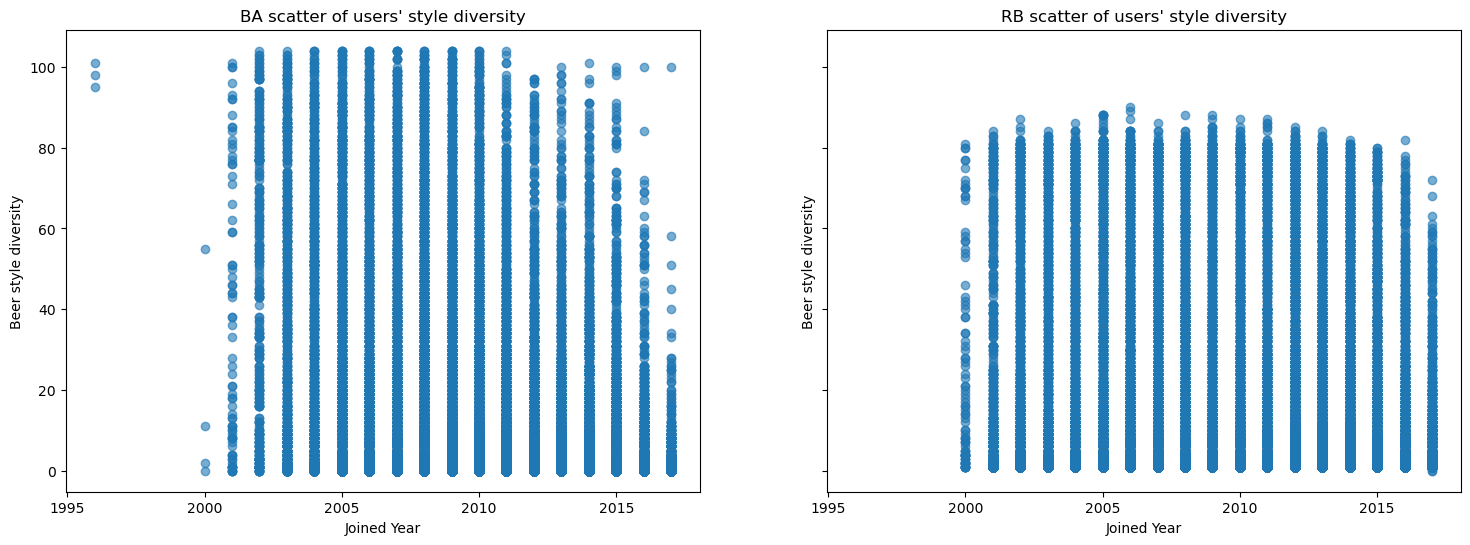

In [47]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
axs[0].scatter(
    ba_users_joined['year_joined'], 
    ba_users_joined['style_diversity'], 
    alpha=0.6
)
axs[1].scatter(
    rb_users_joined['year_joined'], 
    rb_users_joined['style_diversity'], 
    alpha=0.6
)
axs[0].set_title("BA scatter of users' style diversity")
axs[1].set_title("RB scatter of users' style diversity")
for ax in axs:
    ax.set(xlabel='Joined Year', ylabel='Beer style diversity')
plt.show()

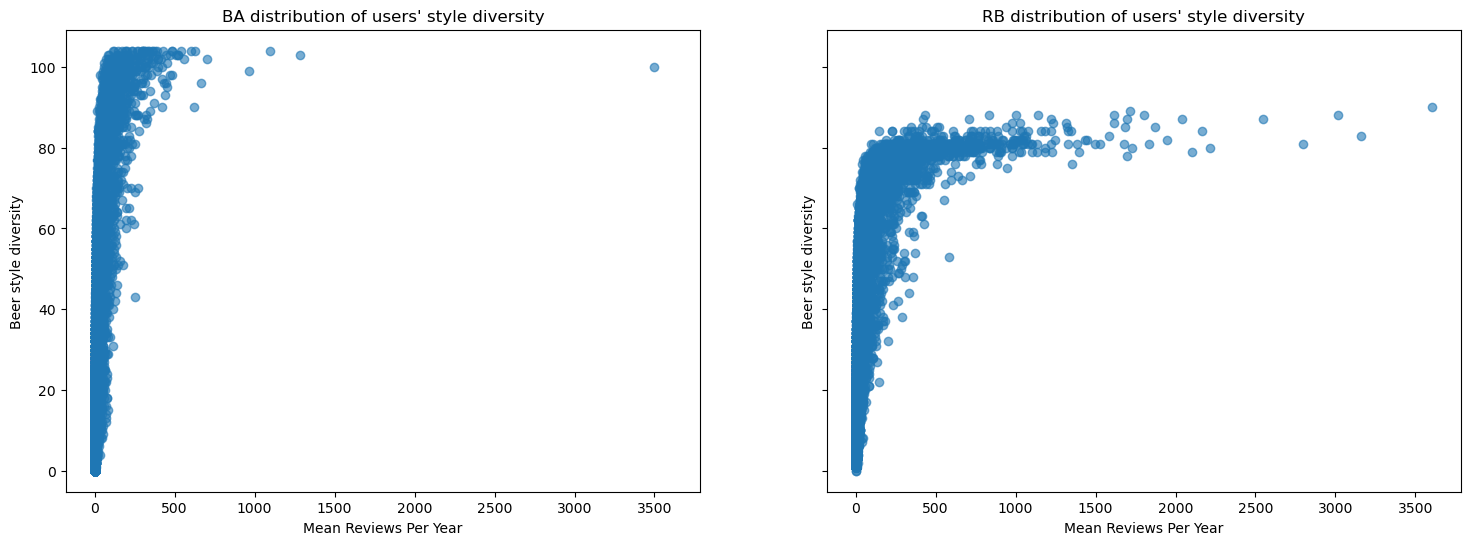

In [48]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
axs[0].scatter(
    ba_users_joined['mean_yearly_reviews'], 
    ba_users_joined['style_diversity'], 
    alpha=0.6
)
axs[1].scatter(
    rb_users_joined['mean_yearly_reviews'], 
    rb_users_joined['style_diversity'], 
    alpha=0.6
)
axs[0].set_title("BA distribution of users' style diversity")
axs[1].set_title("RB distribution of users' style diversity")
for ax in axs:
    ax.set(xlabel='Mean Reviews Per Year', ylabel='Beer style diversity')
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler
# Prepare the data
ba_features = ba_users_joined[['mean_yearly_reviews', 'style_diversity']].dropna()  # Drop NaN values in the column
#ba_features = ba_features[(ba_features['mean_yearly_reviews'] < 1500)]  # Remove outlier
rb_features = rb_users_joined[['mean_yearly_reviews', 'style_diversity']].dropna()

n_clusters = 5


scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()
ba_features['mean_yearly_reviews'] = scaler1.fit_transform(ba_features[['mean_yearly_reviews']]) # Normalize the features
ba_features['style_diversity'] = scaler2.fit_transform(ba_features[['style_diversity']])
rb_features['mean_yearly_reviews'] = scaler3.fit_transform(rb_features[['mean_yearly_reviews']]) # Normalize the features
rb_features['style_diversity'] = scaler4.fit_transform(rb_features[['style_diversity']])

# Apply K-Means clustering
ba_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rb_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
ba_features['cluster'] = ba_kmeans.fit_predict(ba_features)
rb_features['cluster'] = rb_kmeans.fit_predict(rb_features)

# Add the cluster labels back to the original DataFrame
ba_users_joined['cluster'] = pd.NA  # Initialize with NaN
rb_users_joined['cluster'] = pd.NA
ba_users_joined.loc[ba_features.index, 'cluster'] = ba_features['cluster']
rb_users_joined.loc[rb_features.index, 'cluster'] = rb_features['cluster']

# Display cluster centroids
print("Cluster Centers for BeerAdvocate:", ba_kmeans.cluster_centers_)
print("Cluster Centers for RateBeer:", rb_kmeans.cluster_centers_)

# Check the DataFrame with clusters
#display(ba_users_joined)

Cluster Centers for BeerAdvocate: [[ 4.67528149e-01  2.29627436e+00]
 [-9.92193394e-02 -2.13050248e-01]
 [ 1.56849198e+01  7.60805414e+00]
 [ 1.98857535e+02  8.07897282e+00]
 [ 3.08815908e+00  5.93538831e+00]]
Cluster Centers for RateBeer: [[-0.15928422 -0.35178817]
 [ 1.36757356  3.3654276 ]
 [ 7.3759352   4.03275116]
 [ 0.05769541  1.39962405]
 [22.47141791  4.27106314]]


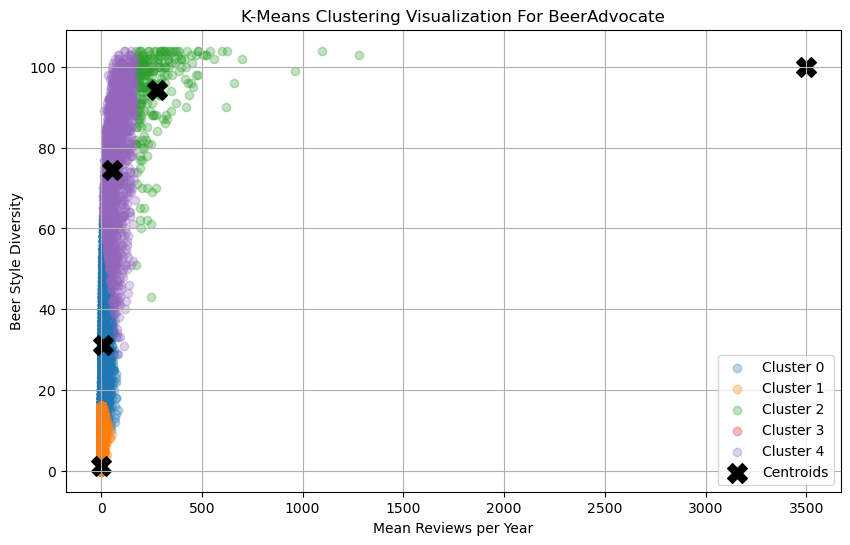

In [50]:
# Ensure the feature DataFrame includes the cluster labels
ba_features['cluster'] = ba_kmeans.labels_
ba_features['mean_yearly_reviews'] = scaler1.inverse_transform(ba_features[['mean_yearly_reviews']]) # Normalize the features
ba_features['style_diversity'] = scaler2.inverse_transform(ba_features[['style_diversity']])

# Create the scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = ba_features[ba_features['cluster'] == cluster]
    plt.scatter(
        cluster_data['mean_yearly_reviews'], 
        cluster_data['style_diversity'], 
        label=f"Cluster {cluster}", 
        alpha=0.3
    )

centroids = ba_kmeans.cluster_centers_
centroids_real = []
for i in range(n_clusters):
    centroid_scaled = centroids[i].reshape(1, -1)  # Reshape to 2D for inverse transform
    original_centroid = [
        scaler1.inverse_transform([[centroid_scaled[0, 0]]])[0][0],
        scaler2.inverse_transform([[centroid_scaled[0, 1]]])[0][0]
    ]
    centroids_real.append(original_centroid)

centroids_real = np.array(centroids_real)

plt.scatter(
    centroids_real[:, 0], centroids_real[:, 1], 
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.xlabel('Mean Reviews per Year')
plt.ylabel('Beer Style Diversity')
plt.title('K-Means Clustering Visualization For BeerAdvocate')
plt.legend()
plt.grid(True)
plt.show()

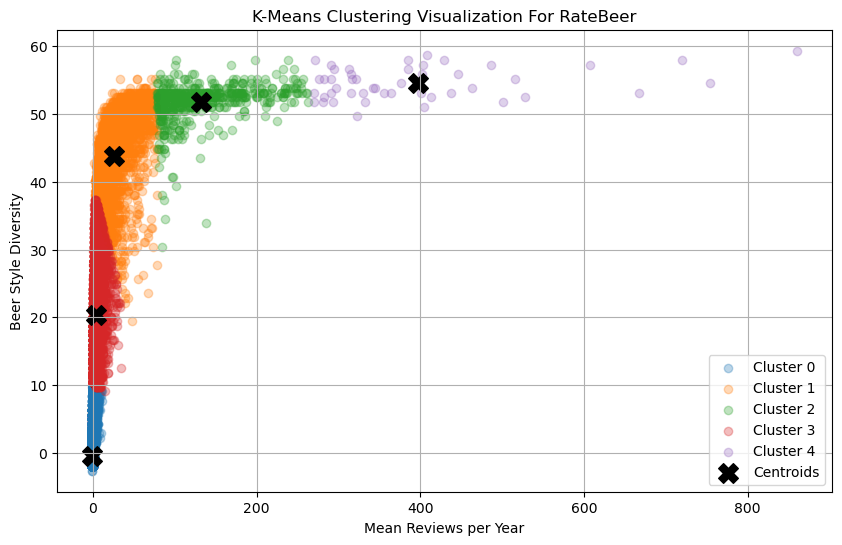

In [51]:
rb_features['cluster'] = rb_kmeans.labels_
rb_features['mean_yearly_reviews'] = scaler1.inverse_transform(rb_features[['mean_yearly_reviews']]) # Normalize the features
rb_features['style_diversity'] = scaler2.inverse_transform(rb_features[['style_diversity']])

# Create the scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = rb_features[rb_features['cluster'] == cluster]
    plt.scatter(
        cluster_data['mean_yearly_reviews'], 
        cluster_data['style_diversity'], 
        label=f"Cluster {cluster}", 
        alpha=0.3
    )

centroids = rb_kmeans.cluster_centers_
centroids_real = []
for i in range(n_clusters):
    centroid_scaled = centroids[i].reshape(1, -1)  # Reshape to 2D for inverse transform
    original_centroid = [
        scaler1.inverse_transform([[centroid_scaled[0, 0]]])[0][0],
        scaler2.inverse_transform([[centroid_scaled[0, 1]]])[0][0]
    ]
    centroids_real.append(original_centroid)

centroids_real = np.array(centroids_real)

plt.scatter(
    centroids_real[:, 0], centroids_real[:, 1], 
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.xlabel('Mean Reviews per Year')
plt.ylabel('Beer Style Diversity')
plt.title('K-Means Clustering Visualization For RateBeer')
plt.legend()
plt.grid(True)
plt.show()

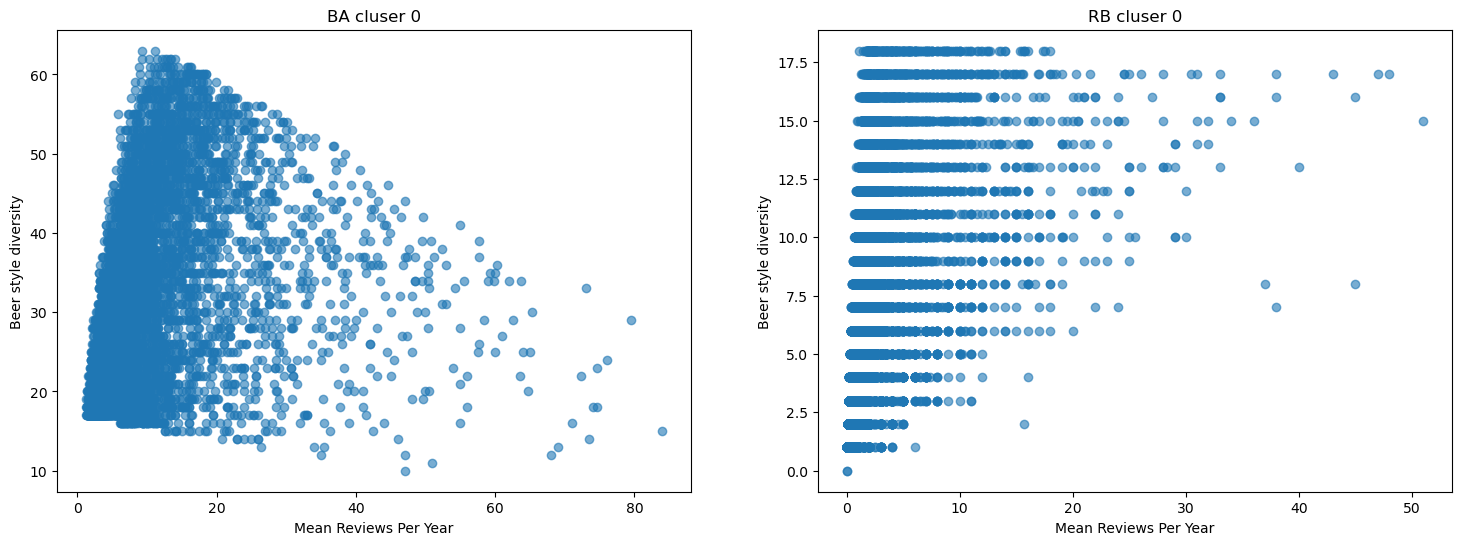

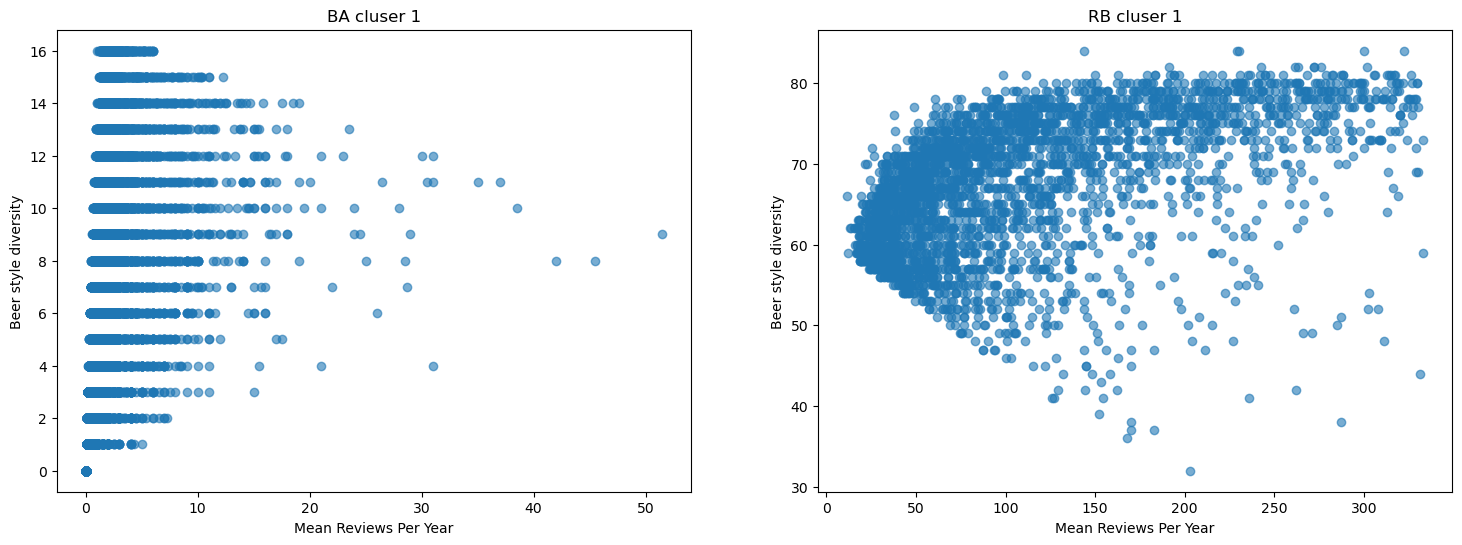

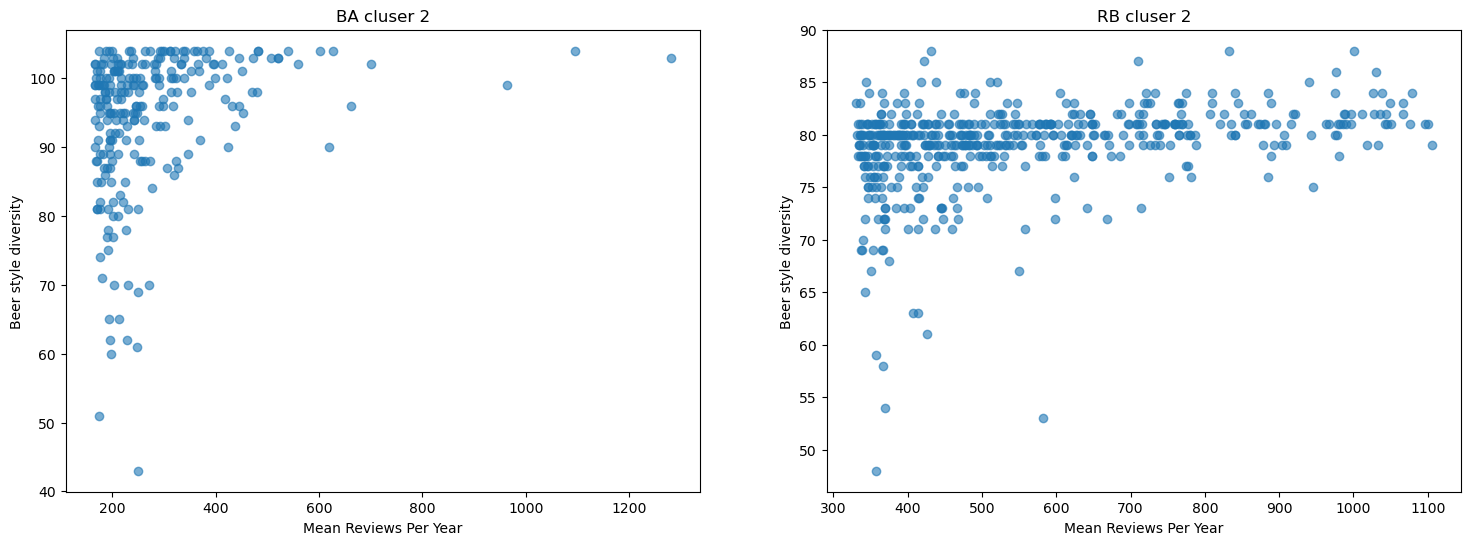

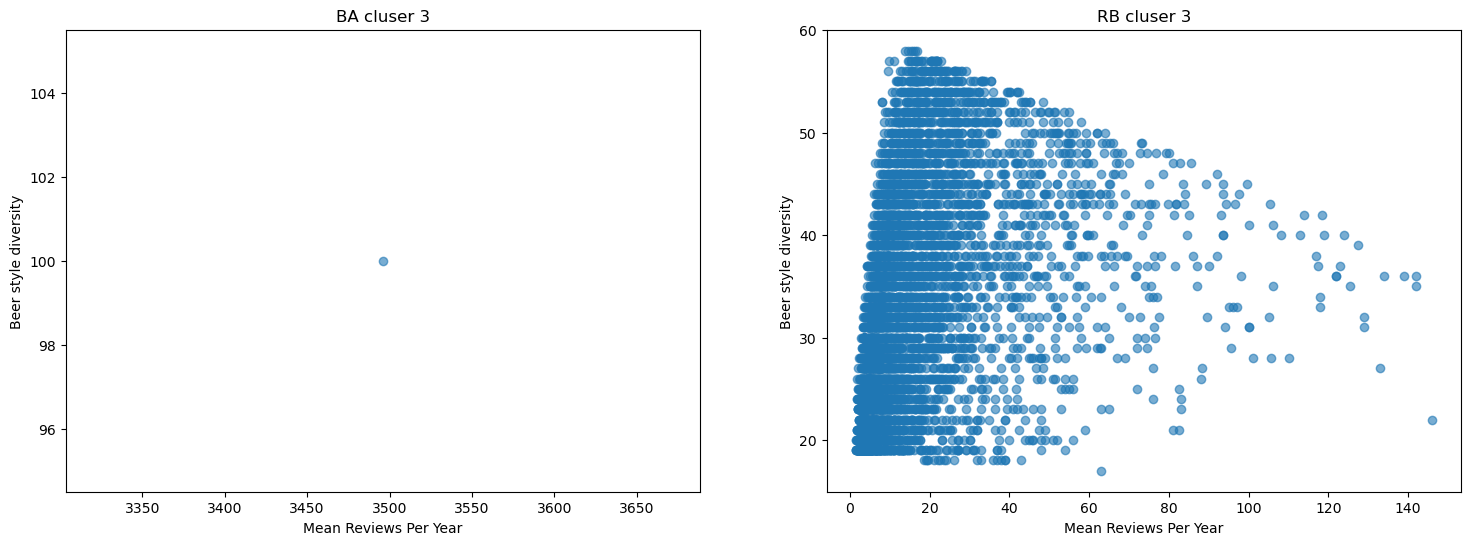

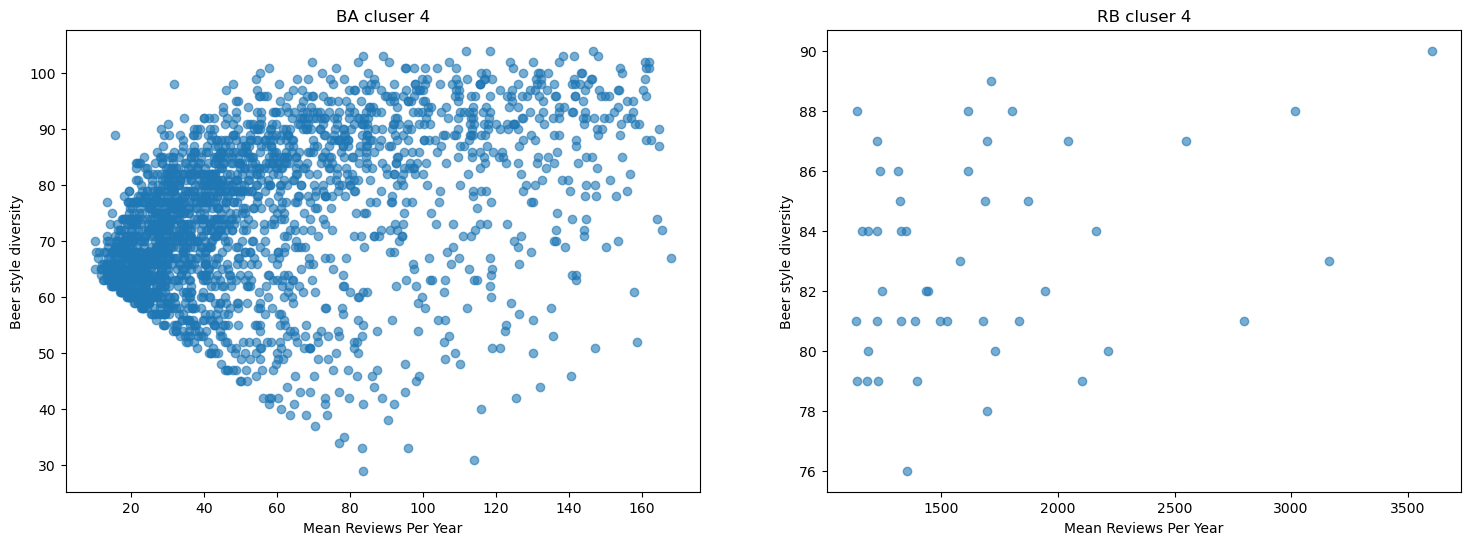

In [52]:
for c in range(n_clusters):
    ba_cluster = ba_users_joined[ba_users_joined['cluster']==c]
    rb_cluster = rb_users_joined[rb_users_joined['cluster']==c]

    fig, axs = plt.subplots(1,2)
    axs[0].scatter(
        ba_cluster['mean_yearly_reviews'], 
        ba_cluster['style_diversity'], 
        alpha=0.6
    )
    axs[1].scatter(
        rb_cluster['mean_yearly_reviews'], 
        rb_cluster['style_diversity'], 
        alpha=0.6
    )
    axs[0].set_title(f"BA cluser {c}")
    axs[1].set_title(f"RB cluser {c}")
    for ax in axs:
        ax.set(xlabel='Mean Reviews Per Year', ylabel='Beer style diversity')
    plt.show()


In [94]:
ba_reviews = pd.read_parquet('generated/new_ba_reviews.parquet')
rb_reviews = pd.read_parquet('generated/new_rb_reviews.parquet')

ba_reviews = ba_reviews.drop(columns=['beer_name', 'brewery_name', 'user_name', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'continent'])
rb_reviews = rb_reviews.drop(columns=['beer_name', 'brewery_name', 'user_name', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'continent'])

display(rb_reviews.head(3))

beer_id  brewery_id       style  abv        date user_id  rating   type
0   410549        3198  Pale Lager  5.0  26/04/2016  175852     2.0  Lager
1   105273        3198  Pale Lager  5.2  17/02/2017  442761     1.9  Lager
2   105273        3198  Pale Lager  5.2  24/06/2016  288889     1.6  Lager

In [95]:
ba_reviews['date'] = pd.to_datetime(ba_reviews['date'], format='%d/%m/%Y')
ba_reviews['year'] = ba_reviews['date'].dt.year

rb_reviews['date'] = pd.to_datetime(rb_reviews['date'], format='%d/%m/%Y')
rb_reviews['year'] = rb_reviews['date'].dt.year

display(rb_reviews.head(3))

beer_id  brewery_id       style  abv       date user_id  rating   type  \
0   410549        3198  Pale Lager  5.0 2016-04-26  175852     2.0  Lager   
1   105273        3198  Pale Lager  5.2 2017-02-17  442761     1.9  Lager   
2   105273        3198  Pale Lager  5.2 2016-06-24  288889     1.6  Lager   

   year  
0  2016  
1  2017  
2  2016

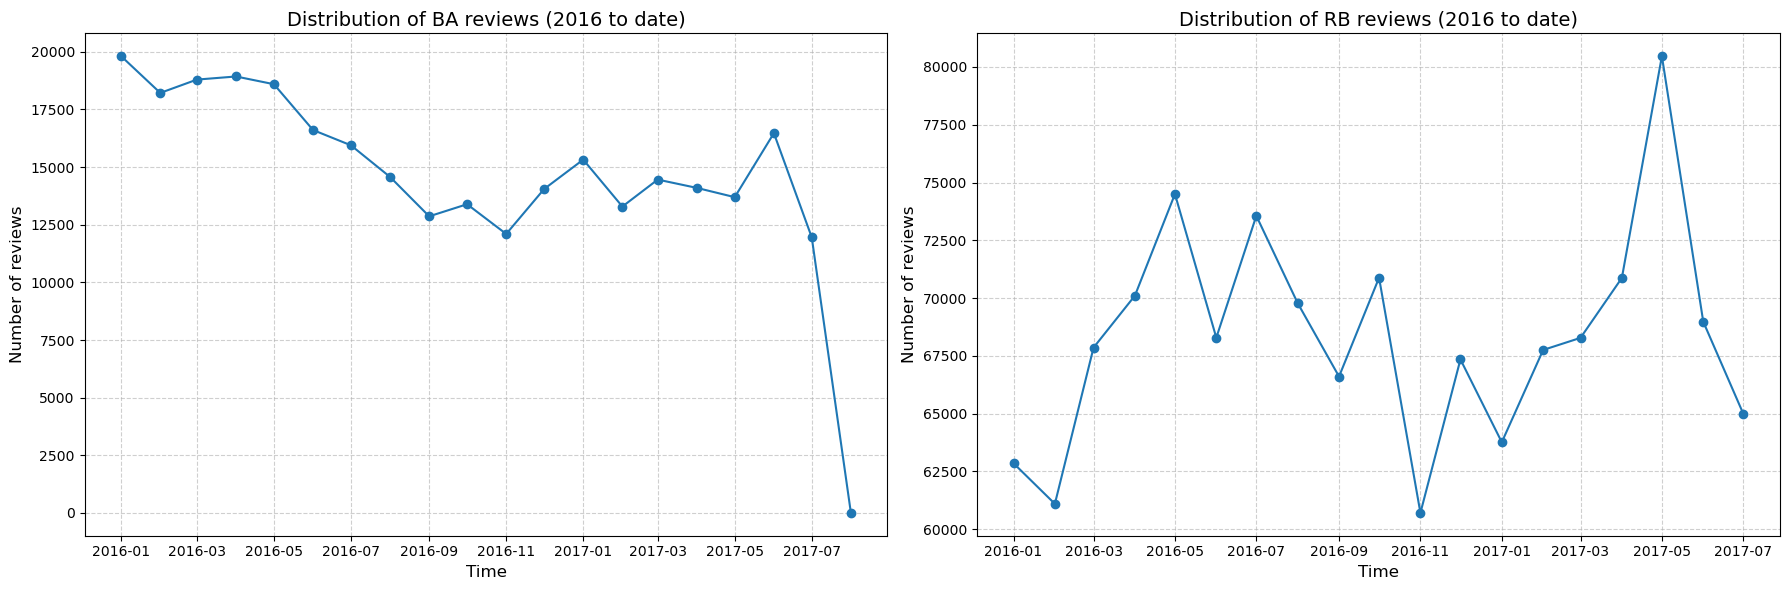

In [98]:
# End of our datasets

# BA
ba_reviews['date'] = pd.to_datetime(ba_reviews['date'], format='%d/%m/%Y')
ba_filtered_reviews = ba_reviews[ba_reviews['date'] >= '2016-01-01']
ba_reviews_per_time = (
    ba_filtered_reviews.groupby(ba_filtered_reviews['date'].dt.to_period('M'))
    .size()
    .reset_index(name='nbr_reviews')
)
ba_reviews_per_time['date'] = ba_reviews_per_time['date'].dt.to_timestamp()

#RB
rb_reviews['date'] = pd.to_datetime(rb_reviews['date'], format='%d/%m/%Y')
rb_filtered_reviews = rb_reviews[rb_reviews['date'] >= '2016-01-01']
rb_reviews_per_time = (
    rb_filtered_reviews.groupby(rb_filtered_reviews['date'].dt.to_period('M'))
    .size()
    .reset_index(name='nbr_reviews')
)
rb_reviews_per_time['date'] = rb_reviews_per_time['date'].dt.to_timestamp()

# plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(ba_reviews_per_time['date'], ba_reviews_per_time['nbr_reviews'], marker='o', linestyle='-')
plt.title('Distribution of BA reviews (2016 to date)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(rb_reviews_per_time['date'], rb_reviews_per_time['nbr_reviews'], marker='o', linestyle='-')
plt.title('Distribution of RB reviews (2016 to date)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


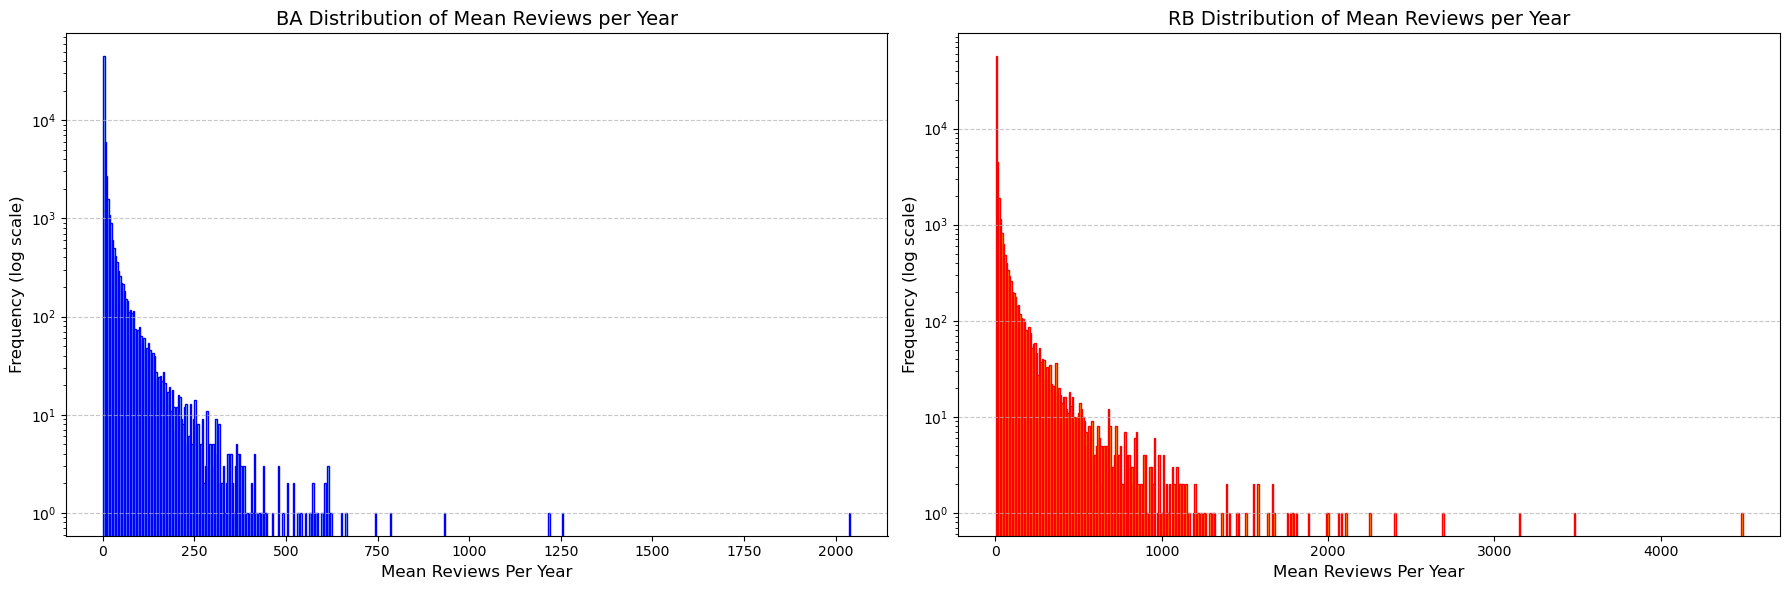

In [122]:
# Average number of reviews per year per user

#BA
ba_reviews_per_year = (
    ba_reviews.groupby(['user_id', 'year'])
    .size()
    .reset_index(name='reviews_per_year')
)
# Adjust for 2017 (7 months)
ba_reviews_per_year['adjusted_reviews_per_year'] = ba_reviews_per_year.apply(
    lambda row: row['reviews_per_year'] * (7/12) if row['year'] == 2017 else row['reviews_per_year'],
    axis=1
)
ba_mean_reviews_per_year = (
    ba_reviews_per_year.groupby('user_id')['adjusted_reviews_per_year']
    .mean()
    .reset_index(name='mean_reviews_per_year')
)

#RB
rb_reviews_per_year = (
    rb_reviews.groupby(['user_id', 'year'])
    .size()
    .reset_index(name='reviews_per_year')
)
# Adjust for 2017 (7 months)
rb_reviews_per_year['adjusted_reviews_per_year'] = rb_reviews_per_year.apply(
    lambda row: row['reviews_per_year'] * (7/12) if row['year'] == 2017 else row['reviews_per_year'],
    axis=1
)

rb_mean_reviews_per_year = (
    rb_reviews_per_year.groupby('user_id')['adjusted_reviews_per_year']
    .mean()
    .reset_index(name='mean_reviews_per_year')
)

# plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(ba_mean_reviews_per_year['mean_reviews_per_year'].dropna(), 
         log=True, bins=500, color='skyblue', edgecolor='blue')
plt.title("BA Distribution of Mean Reviews per Year", fontsize=14)
plt.xlabel('Mean Reviews Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(rb_mean_reviews_per_year['mean_reviews_per_year'].dropna(), 
         log=True, bins=500, color='orange', edgecolor='red')
plt.title("RB Distribution of Mean Reviews per Year", fontsize=14)
plt.xlabel('Mean Reviews Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


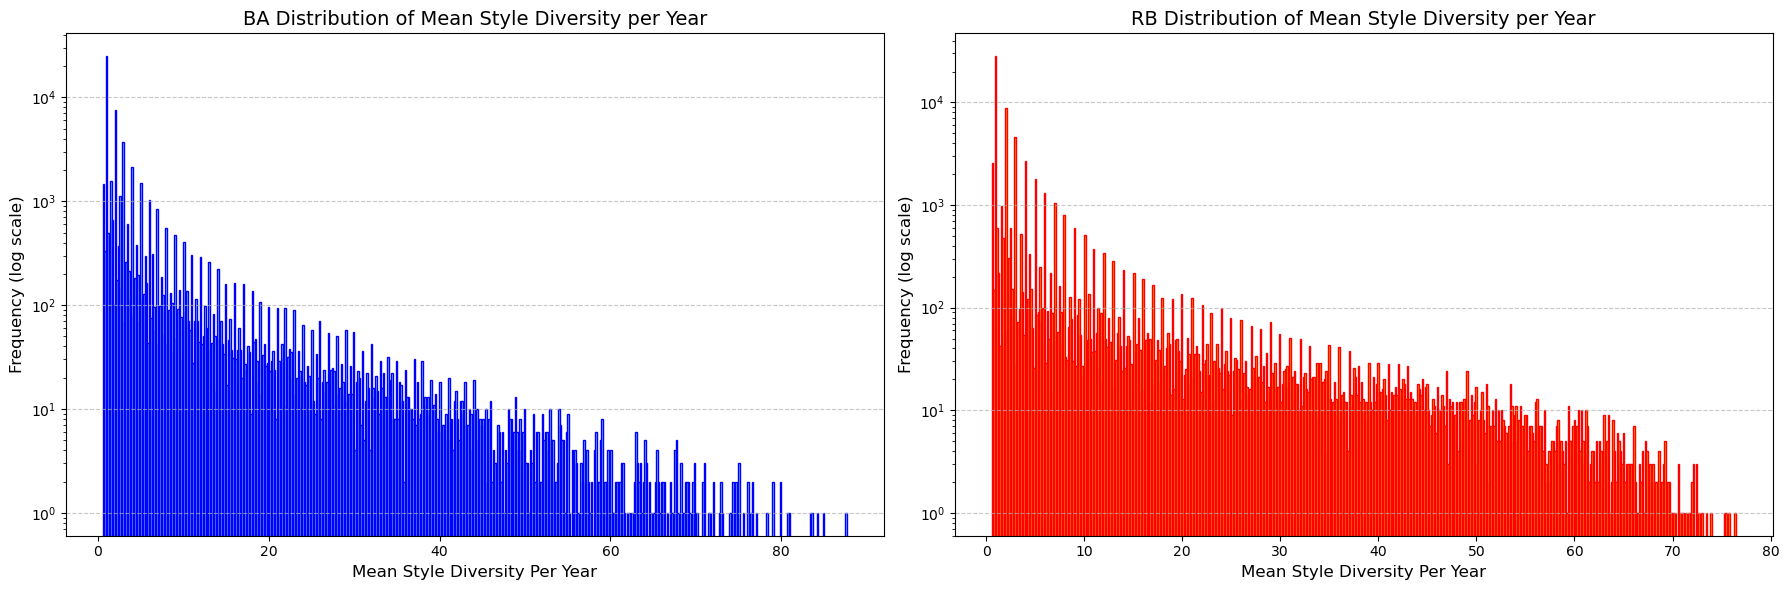

In [121]:
#  Diversity of styles per year per user

#BA
ba_style_diversity = (
    ba_reviews.groupby(['user_id', 'year'])['style']
    .nunique()
    .reset_index(name='style_diversity_per_year')
)
# Adjust for 2017 (7 months)
ba_style_diversity['adjusted_style_diversity_per_year'] = ba_style_diversity.apply(
    lambda row: row['style_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['style_diversity_per_year'],
    axis=1
)
ba_mean_style_diversity = (
    ba_style_diversity.groupby('user_id')['adjusted_style_diversity_per_year']
    .mean()
    .reset_index(name='mean_style_diversity')
)

#RB
rb_style_diversity = (
    rb_reviews.groupby(['user_id', 'year'])['style']
    .nunique()
    .reset_index(name='style_diversity_per_year')
)
# Adjust for 2017 (7 months)
rb_style_diversity['adjusted_style_diversity_per_year'] = rb_style_diversity.apply(
    lambda row: row['style_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['style_diversity_per_year'],
    axis=1
)
rb_mean_style_diversity = (
    rb_style_diversity.groupby('user_id')['adjusted_style_diversity_per_year']
    .mean()
    .reset_index(name='mean_style_diversity')
)

# plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(ba_mean_style_diversity['mean_style_diversity'].dropna(), 
         log=True, bins=500, color='skyblue', edgecolor='blue')
plt.title("BA Distribution of Mean Style Diversity per Year", fontsize=14)
plt.xlabel('Mean Style Diversity Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(rb_mean_style_diversity['mean_style_diversity'].dropna(), 
         log=True, bins=500, color='orange', edgecolor='red')
plt.title("RB Distribution of Mean Style Diversity per Year", fontsize=14)
plt.xlabel('Mean Style Diversity Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

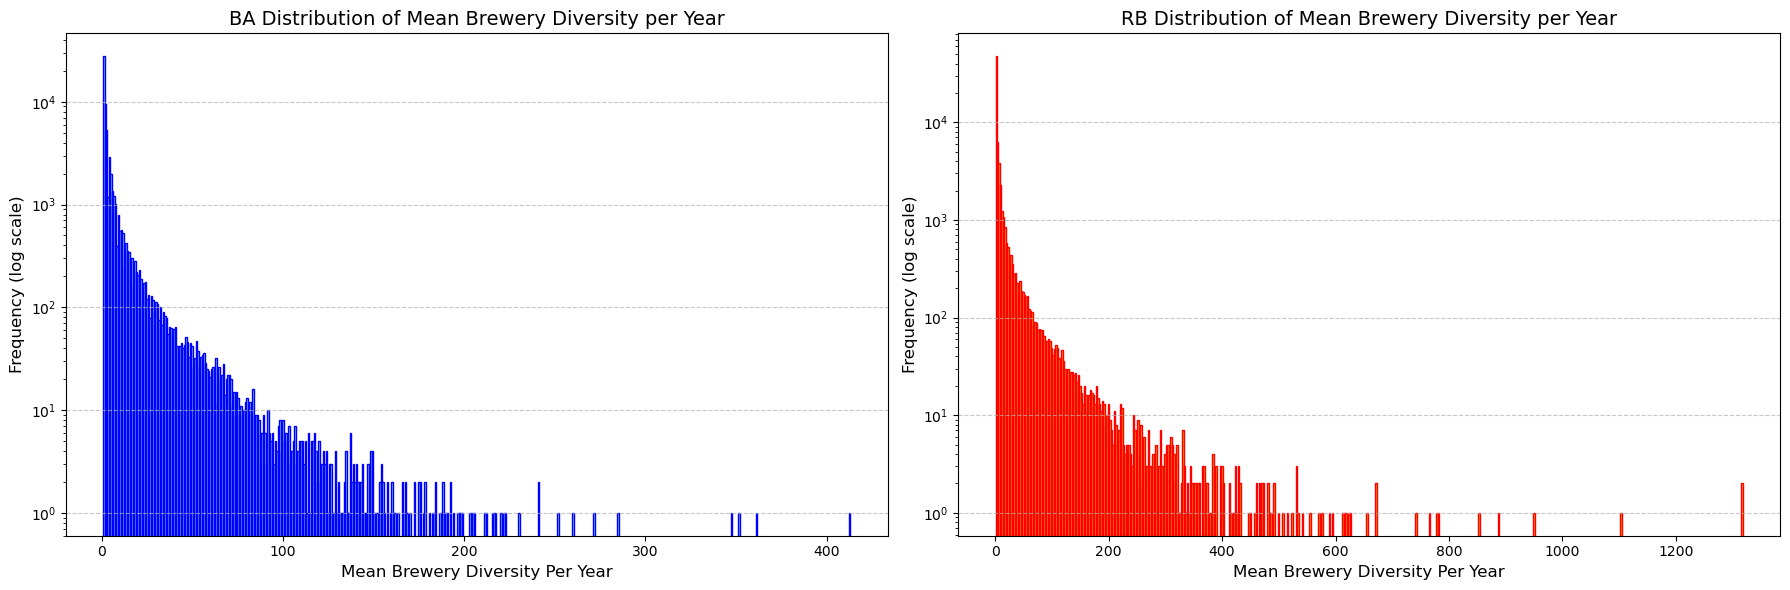

In [123]:
# Diversity of breweries per year per user

#BA
ba_brewery_diversity = (
    ba_reviews.groupby(['user_id', 'year'])['brewery_id']
    .nunique()
    .reset_index(name='brewery_diversity_per_year')
)
# Adjust for 2017 (7 months)
ba_brewery_diversity['adjusted_brewery_diversity_per_year'] = ba_brewery_diversity.apply(
    lambda row: row['brewery_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['brewery_diversity_per_year'],
    axis=1
)
ba_mean_brewery_diversity = (
    ba_brewery_diversity.groupby('user_id')['adjusted_brewery_diversity_per_year']
    .mean()
    .reset_index(name='mean_brewery_diversity')
)

#RB
rb_brewery_diversity = (
    rb_reviews.groupby(['user_id', 'year'])['brewery_id']
    .nunique()
    .reset_index(name='brewery_diversity_per_year')
)
# Adjust for 2017 (7 months)
rb_brewery_diversity['adjusted_brewery_diversity_per_year'] = rb_brewery_diversity.apply(
    lambda row: row['brewery_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['brewery_diversity_per_year'],
    axis=1
)
rb_mean_brewery_diversity = (
    rb_brewery_diversity.groupby('user_id')['adjusted_brewery_diversity_per_year']
    .mean()
    .reset_index(name='mean_brewery_diversity')
)

# plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(ba_mean_brewery_diversity['mean_brewery_diversity'].dropna(), 
         log=True, bins=500, color='skyblue', edgecolor='blue')
plt.title("BA Distribution of Mean Brewery Diversity per Year", fontsize=14)
plt.xlabel('Mean Brewery Diversity Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(rb_mean_brewery_diversity['mean_brewery_diversity'].dropna(), 
         log=True, bins=500, color='orange', edgecolor='red')
plt.title("RB Distribution of Mean Brewery Diversity per Year", fontsize=14)
plt.xlabel('Mean Brewery Diversity Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


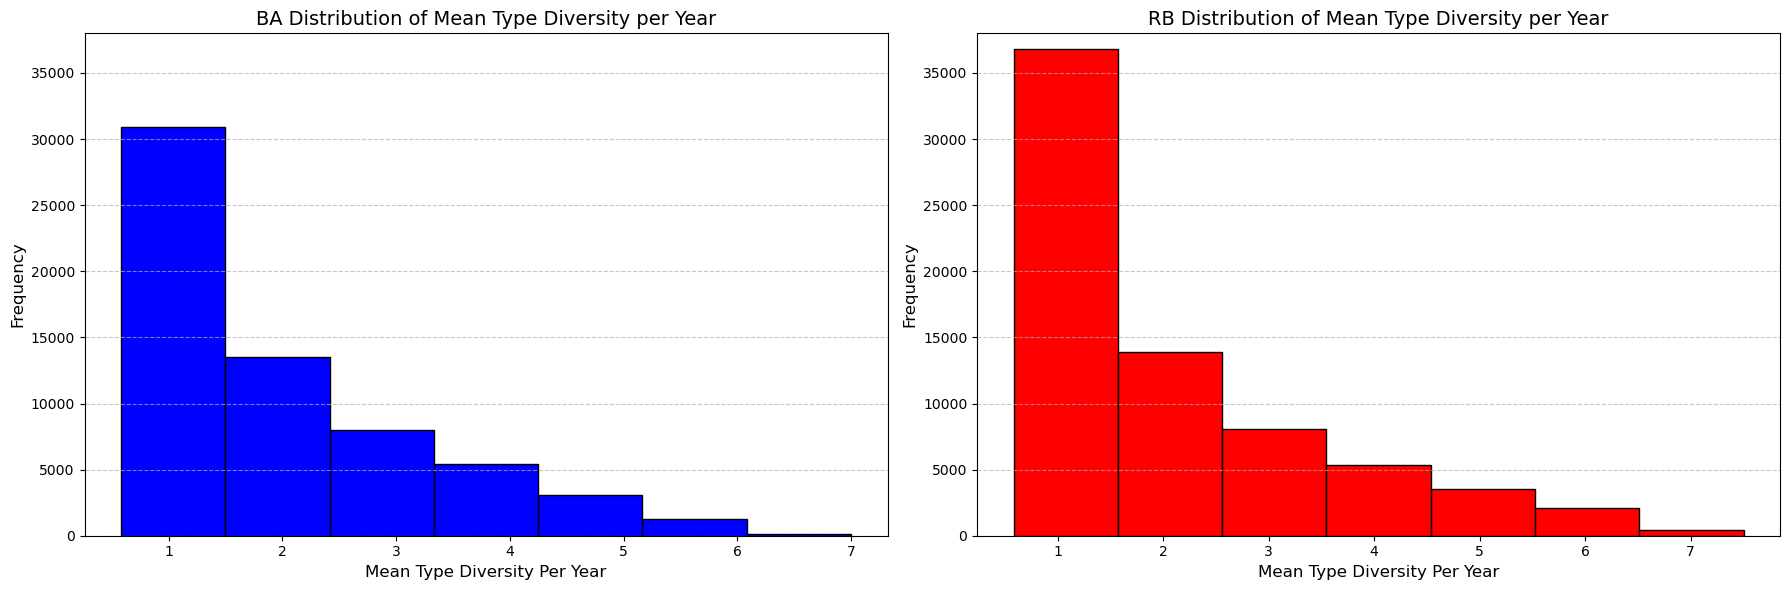

In [111]:
# Calculation of the diversity of types of beer per year per user

#BA
ba_type_diversity = (
    ba_reviews.groupby(['user_id', 'year'])['type']
    .nunique()
    .reset_index(name='type_diversity_per_year')
)
# Adjust for 2017 (7 months)
ba_type_diversity['adjusted_type_diversity_per_year'] = ba_type_diversity.apply(
    lambda row: row['type_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['type_diversity_per_year'],
    axis=1
)
ba_mean_type_diversity = (
    ba_type_diversity.groupby('user_id')['adjusted_type_diversity_per_year']
    .mean()
    .reset_index(name='mean_type_diversity')
)

#RB
rb_type_diversity = (
    rb_reviews.groupby(['user_id', 'year'])['type']
    .nunique()
    .reset_index(name='type_diversity_per_year')
)
# Adjust for 2017 (7 months)
rb_type_diversity['adjusted_type_diversity_per_year'] = rb_type_diversity.apply(
    lambda row: row['type_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['type_diversity_per_year'],
    axis=1
)
rb_mean_type_diversity = (
    rb_type_diversity.groupby('user_id')['adjusted_type_diversity_per_year']
    .mean()
    .reset_index(name='mean_type_diversity')
)

# plot
# Plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(ba_mean_type_diversity['mean_type_diversity'].dropna(), 
         log=False, bins=7, color='blue', edgecolor='black')
plt.title("BA Distribution of Mean Type Diversity per Year", fontsize=14)
plt.xlabel('Mean Type Diversity Per Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim(0, 38000) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(rb_mean_type_diversity['mean_type_diversity'].dropna(), 
         log=False, bins=7, color='red', edgecolor='black')
plt.title("RB Distribution of Mean Type Diversity per Year", fontsize=14)
plt.xlabel('Mean Type Diversity Per Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim(0, 38000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



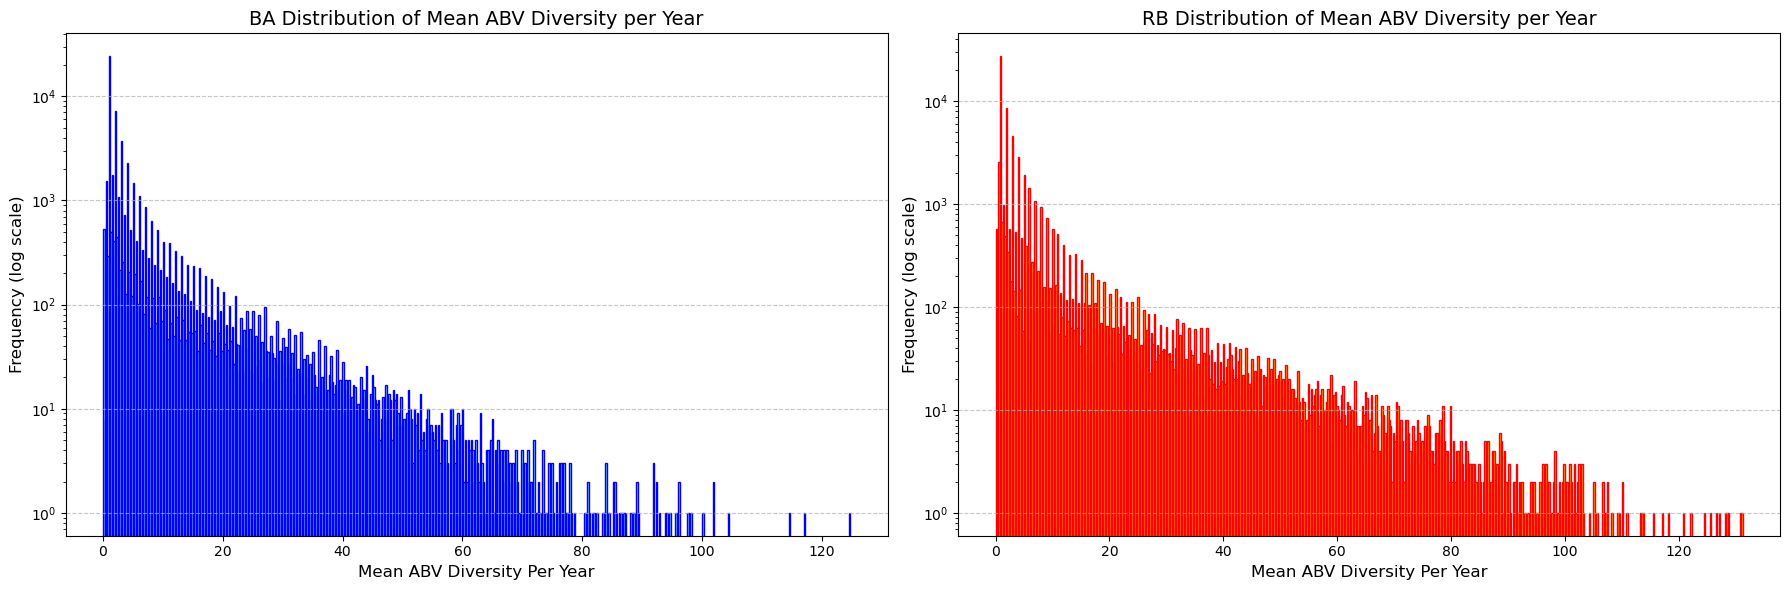

In [124]:
# Calculation of the diversity of ABV per year per user

#BA
ba_abv_diversity = (
    ba_reviews.groupby(['user_id', 'year'])['abv']
    .nunique()
    .reset_index(name='abv_diversity_per_year')
)
# Adjust for 2017 (7 months)
ba_abv_diversity['adjusted_abv_diversity_per_year'] = ba_abv_diversity.apply(
    lambda row: row['abv_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['abv_diversity_per_year'],
    axis=1
)
ba_mean_abv_diversity = (
    ba_abv_diversity.groupby('user_id')['adjusted_abv_diversity_per_year']
    .mean()
    .reset_index(name='mean_abv_diversity')
)

#RB
rb_abv_diversity = (
    rb_reviews.groupby(['user_id', 'year'])['abv']
    .nunique()
    .reset_index(name='abv_diversity_per_year')
)
# Adjust for 2017 (7 months)
rb_abv_diversity['adjusted_abv_diversity_per_year'] = rb_abv_diversity.apply(
    lambda row: row['abv_diversity_per_year'] * (7/12) if row['year'] == 2017 else row['abv_diversity_per_year'],
    axis=1
)
rb_mean_abv_diversity = (
    rb_abv_diversity.groupby('user_id')['adjusted_abv_diversity_per_year']
    .mean()
    .reset_index(name='mean_abv_diversity')
)

# plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(ba_mean_abv_diversity['mean_abv_diversity'].dropna(), 
         log=True, bins=500, color='skyblue', edgecolor='blue')
plt.title("BA Distribution of Mean ABV Diversity per Year", fontsize=14)
plt.xlabel('Mean ABV Diversity Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(rb_mean_abv_diversity['mean_abv_diversity'].dropna(), 
         log=True, bins=500, color='orange', edgecolor='red')
plt.title("RB Distribution of Mean ABV Diversity per Year", fontsize=14)
plt.xlabel('Mean ABV Diversity Per Year', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [127]:
ba_result = ba_mean_reviews_per_year.merge(ba_mean_style_diversity, on='user_id')
ba_result = ba_result.merge(ba_mean_brewery_diversity, on='user_id')
ba_result = ba_result.merge(ba_mean_type_diversity, on='user_id')
ba_result = ba_result.merge(ba_mean_abv_diversity, on='user_id')

rb_result = rb_mean_reviews_per_year.merge(rb_mean_style_diversity, on='user_id')
rb_result = rb_result.merge(rb_mean_brewery_diversity, on='user_id')
rb_result = rb_result.merge(rb_mean_type_diversity, on='user_id')
rb_result = rb_result.merge(rb_mean_abv_diversity, on='user_id')


display(ba_result.head(2))
display(rb_result.head(2))

user_id  mean_reviews_per_year  mean_style_diversity  \
0    --dom--.709199               8.694444              4.694444   
1  --weezl--.789708               3.000000              3.000000   

   mean_brewery_diversity  mean_type_diversity  mean_abv_diversity  
0                7.527778             2.527778            7.361111  
1                2.000000             2.000000            3.000000

user_id  mean_reviews_per_year  mean_style_diversity  \
0      10               5.000000              4.000000   
1  100007              12.166667              8.333333   

   mean_brewery_diversity  mean_type_diversity  mean_abv_diversity  
0                4.000000                  4.0            4.000000  
1               10.666667                  3.5            9.666667

In [134]:
ba_features = ba_result.copy()
rb_features = rb_result.copy()

ba_features = ba_features.drop("user_id", axis=1)
rb_features = rb_features.drop("user_id", axis=1)

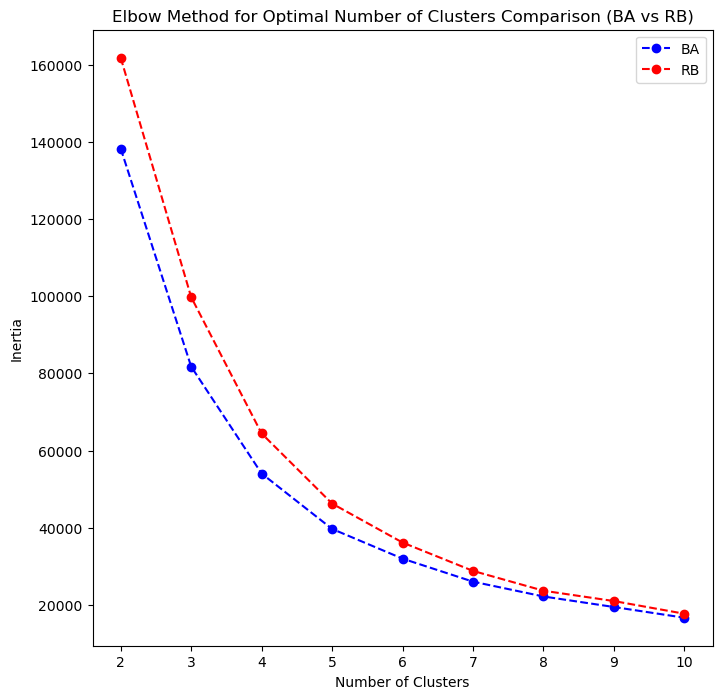

In [148]:
ba_scaled_features = StandardScaler().fit(ba_features).transform(ba_features)
rb_scaled_features = StandardScaler().fit(rb_features).transform(rb_features)

# determine optimal number of clusters (elbow method)
inertia_ba = []
range_n_clusters = range(2, 11)  # Test 2 to 10 clusters
for n_clusters in range_n_clusters:
    kmeans_ba = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_ba.fit(ba_scaled_features)
    inertia_ba.append(kmeans_ba.inertia_)

inertia_rb = []
for n_clusters in range_n_clusters:
    kmeans_rb = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_rb.fit(rb_scaled_features)
    inertia_rb.append(kmeans_rb.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(range_n_clusters, inertia_ba, marker='o', linestyle='--', color='blue', label='BA')
plt.plot(range_n_clusters, inertia_rb, marker='o', linestyle='--', color='red', label='RB')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters Comparison (BA vs RB)')
plt.legend()
plt.show()

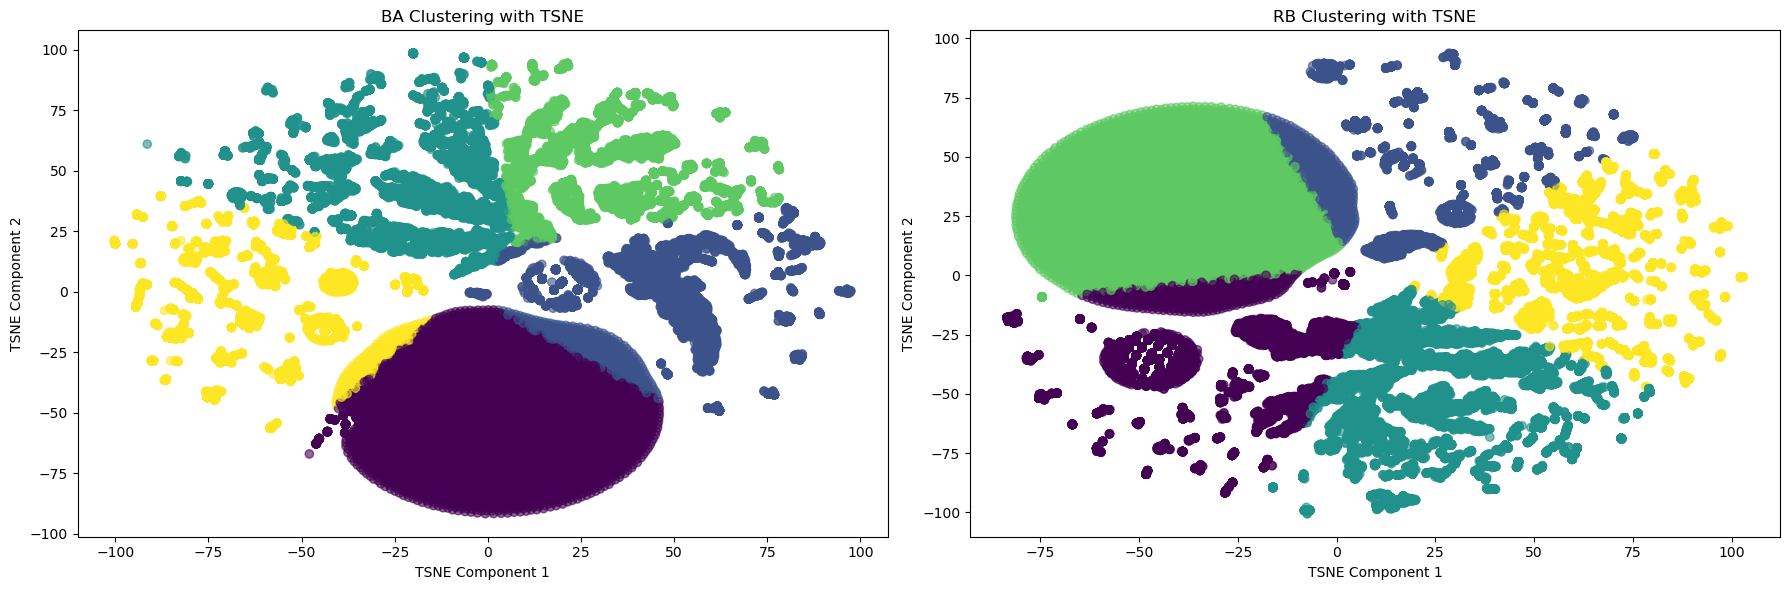

In [147]:
ba_feat_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42).fit_transform(ba_scaled_features)
rb_feat_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42).fit_transform(rb_scaled_features)

ba_labels = KMeans(n_clusters=5).fit_predict(ba_feat_reduced_tsne)
rb_labels = KMeans(n_clusters=5).fit_predict(rb_feat_reduced_tsne)


# Plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(ba_feat_reduced_tsne[:, 0], ba_feat_reduced_tsne[:, 1], c=ba_labels, alpha=0.6, cmap='viridis')
plt.title("BA Clustering with TSNE")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")

plt.subplot(1, 2, 2)
plt.scatter(rb_feat_reduced_tsne[:, 0], rb_feat_reduced_tsne[:, 1], c=rb_labels, alpha=0.6, cmap='viridis')
plt.title("RB Clustering with TSNE")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")

plt.tight_layout()
plt.show()

In [150]:
ba_data = {
    'mean_reviews_per_year': ba_mean_reviews_per_year['mean_reviews_per_year'],
    'mean_style_diversity': ba_mean_style_diversity['mean_style_diversity'],
    'mean_brewery_diversity': ba_mean_brewery_diversity['mean_brewery_diversity'],
    'mean_type_diversity': ba_mean_type_diversity['mean_type_diversity'],
    'mean_abv_diversity': ba_mean_abv_diversity['mean_abv_diversity'],
    'cluster': ba_labels
}
rb_data = {
    'mean_reviews_per_year': rb_mean_reviews_per_year['mean_reviews_per_year'],
    'mean_style_diversity': rb_mean_style_diversity['mean_style_diversity'],
    'mean_brewery_diversity': rb_mean_brewery_diversity['mean_brewery_diversity'],
    'mean_type_diversity': rb_mean_type_diversity['mean_type_diversity'],
    'mean_abv_diversity': rb_mean_abv_diversity['mean_abv_diversity'],
    'cluster': rb_labels
}

ba_recap = pd.DataFrame(ba_data).groupby('cluster').mean()
rb_recap = pd.DataFrame(rb_data).groupby('cluster').mean()

print("BA Recap:")
print(ba_recap)
print("\nRB Recap:")
print(rb_recap)

BA Recap:
         mean_reviews_per_year  mean_style_diversity  mean_brewery_diversity  \
cluster                                                                        
0                     1.002642              1.000000                1.000816   
1                    37.063471             13.584987               19.820597   
2                     9.149777              6.504244                7.077919   
3                     8.751709              5.294420                6.539311   
4                     1.928617              1.733649                1.811387   

         mean_type_diversity  mean_abv_diversity  
cluster                                           
0                   1.000000            1.000939  
1                   3.215389           14.965395  
2                   2.920169            7.137901  
3                   2.399299            6.392186  
4                   1.416378            1.796672  

RB Recap:
         mean_reviews_per_year  mean_style_diversity  mean_br